# **Project Name**    -**Airline Passeneger Referral Prediction**




##### **Project Type**    - **Classification/Airline Passeneger Referral Prediction**
##### **Contribution**    - **Data_Marcos**
##### **Team Member 1 -** **Ritik Gour**
##### **Team Member 2 -** **Manish Kumar Prasad**
##### **Team Member 3 -** **Nitesh Kumar**
##### **Team Member 4 -** **Ashish Kumar**

###**Github Link** https://github.com/ritikgour/Airline_passanger_Referra_predictionl.git



# **Project Summary -**
The Airline Passenger Recommendation System has become the most important standard in the international aviation industry to avoid the worldwide pressure to compete in the global market. Airline recommendations are mostly based on seats, distance traveled, route, time, flight frequency, ground handling, etc. laying out a distributed machine learning model that helps the aerospace industry focus on addressing features that can help them grow their businesses better than their competitors.

##**Problem Statement:**
The document includes flight reviews of the world's most popular airlines from 2006 to 2019, with multiple choice and free questions. Data were collected in the spring of 2019. The main purpose is to predict whether passengers will recommend the airline to their friends.


**Data descriptions:-**
**arline: Name of the airline.**

**overall overall: Overall point is given to the trip between 1 to 10.**

**author: Aurthor of the trip**.

**reviewdate: Date of the review customer reviews: Review of the customers in free text formate.**

**aircarft: Type of the aircraft.**

**travellertype: Type of traveler (e.g business, leisure).**

**cabin cabin: Flight date Cabin at the flight date flown:**

**seatcomfort: Rated between 1-5**

**cabin service: Rated between 1-5**

**foodbev: Rated between 1-5 entrtainment: Rated between 1-5**

***groundservice: Rated between 1-5***

**valueformoney: Rated between 1-5**

#**Import Libraries**

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb

In [7]:
# Import Metrics for evalutions for our models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Reading the xlsx file from drive
df=pd.read_excel("/content/drive/MyDrive/Airline_Passenger_Referral/data_airline_reviews.xlsx")

#Let's Understand the Data

In [10]:
df.head().T

,0,1,2,3,4
airline,NaN,Turkish Airlines,NaN,Turkish Airlines,NaN
overall,NaN,7.0,NaN,2.0,NaN
author,NaN,Christopher Hackley,NaN,Adriana Pisoi,NaN
review_date,NaN,8th May 2019,NaN,7th May 2019,NaN
customer_review,NaN,âœ… Trip Verified | London to Izmir via Istanb...,NaN,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN
aircraft,NaN,NaN,NaN,NaN,NaN
traveller_type,NaN,Business,NaN,Family Leisure,NaN
cabin,NaN,Economy Class,NaN,Economy Class,NaN
route,NaN,London to Izmir via Istanbul,NaN,Istanbul to Bucharest,NaN
date_flown,NaN,2019-05-01 00:00:00,NaN,2019-05-01 00:00:00,NaN


##**Exploratory Data Analysis(EDA)**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

****Here we can see that there are 131895 rows and 17 columns. We can also see that there are 7 floating point properties and 10 object type.****

In [12]:
# Let's calculated the null vales
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [13]:
# drop the null values
df.dropna(how='all',inplace=True)


In [14]:
# Counting number of duplicate values
df.duplicated().sum()

4764

In [15]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [17]:
df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64


**Successfully removed all null values ​​from Airline, author, customer_review, review_date columns**

In [18]:
top6_airlines=df['airline'].value_counts()[0:6]
top6_airlines

Spirit Airlines            2871
American Airlines          2846
United Airlines            2774
British Airways            2731
Emirates                   1763
China Southern Airlines    1719
Name: airline, dtype: int64

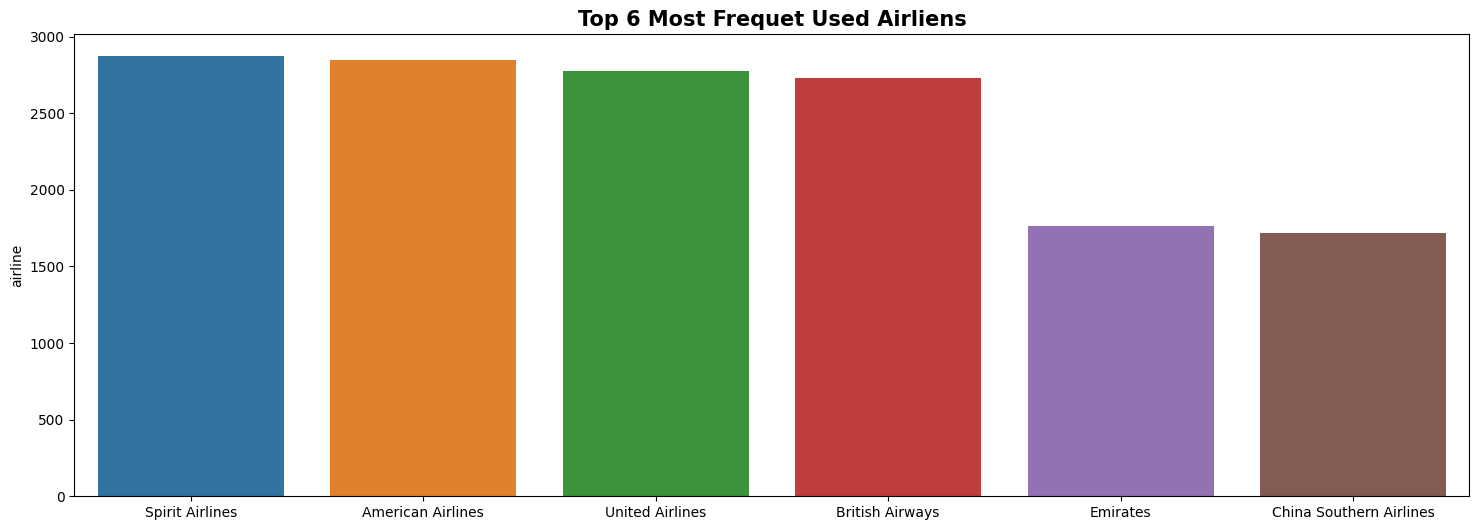

In [19]:
#Visualize top 6 most frequent uesd airlines
plt.figure(figsize=(18,6))
graph = sns.barplot(x=top6_airlines.index, y=top6_airlines, data=df)
graph.set_title("Top 6 Most Frequet Used Airliens", fontsize=15, fontweight='bold')
plt.show()

**From the map we can determine that Spirit Airways is the most used airline based on the data provided with a total of 2800.**

**China Southern Airlines ranks sixth with nearly 1,600 aircraft**

In [20]:
top10_aircraft = df['aircraft'].value_counts()[0:10]
top10_aircraft

A320                2130
A380                1109
Boeing 777          1101
Boeing 737-800      1021
A330                 974
Boeing 787           833
Boeing 777-300ER     737
A321                 649
Boeing 737           649
A319                 639
Name: aircraft, dtype: int64

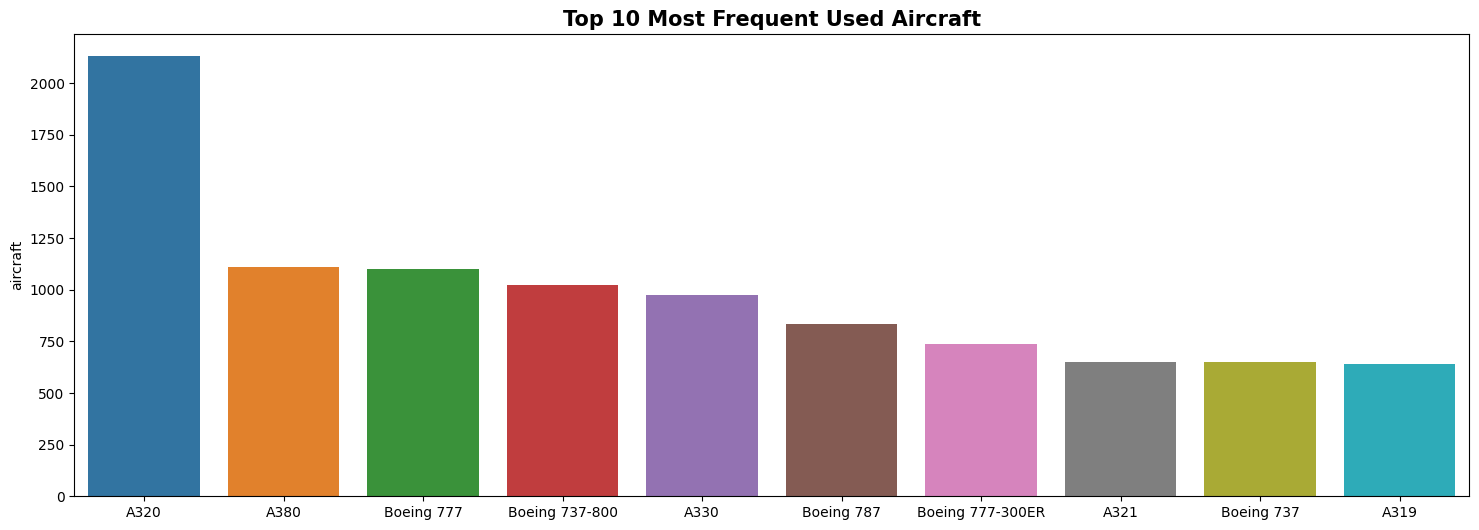

In [21]:
#Visualize top 10 most frequent uesd airlines
plt.figure(figsize=(18,6))
graph = sns.barplot(x=top10_aircraft.index, y=top10_aircraft, data=df)
graph.set_title("Top 10 Most Frequent Used Aircraft",fontsize=15, fontweight='bold')

plt.show()

**It is seen that the A320 is the most frequently used and used aircraft.**

**Explain that the A320 aircraft is very popular with airlines**s

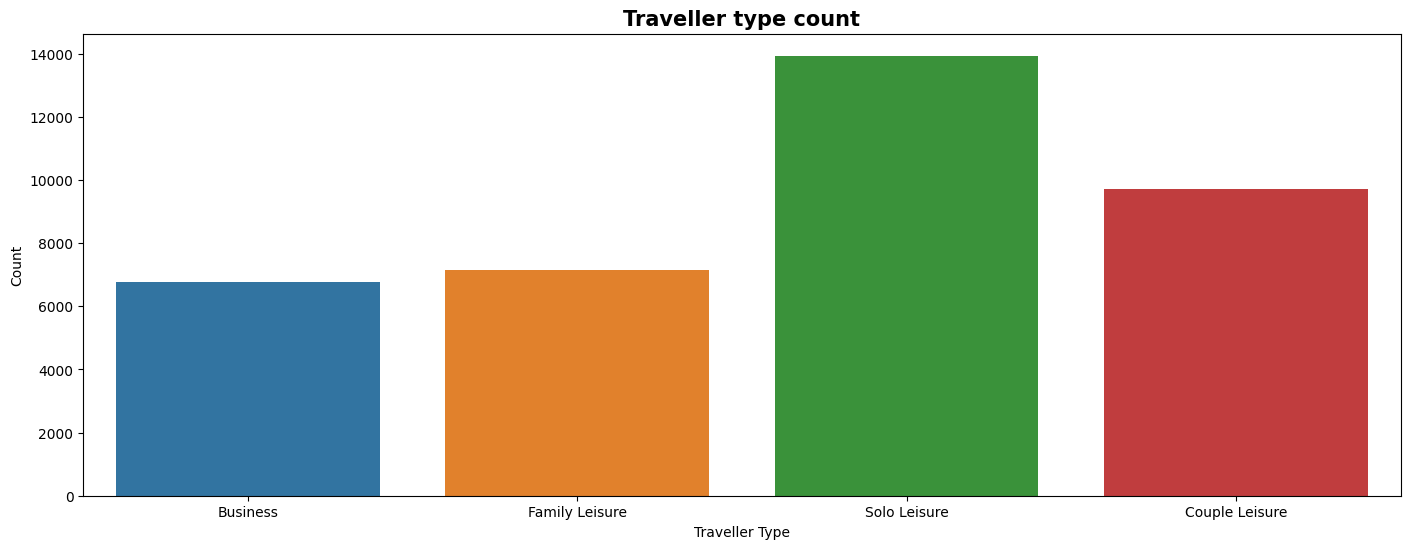

In [22]:
plt.figure(figsize=(17,6))
sns.countplot(x='traveller_type',data=df)
plt.title('Traveller type count', fontsize=15, fontweight='bold')
plt.xlabel('Traveller Type')
plt.ylabel('Count')

plt.show()

*   **We can see that there are now 4 classes in the Explorer Type property.**
*   **We can also see that Solo Leisure has the highest price. From this we can conclude that most people who travel with airlines travel alone. Then comes the university, then the family.**

*   **Very small percentage of people prefer flying for business.**


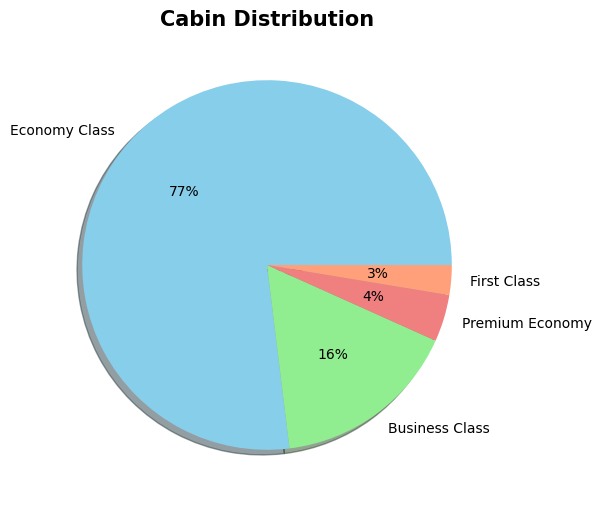

In [23]:
cabin_counts = df['cabin'].value_counts()

plt.figure(figsize=(20,5))
cabin_counts.plot.pie(autopct = '%1.0f%%', figsize=(15,6), colors=['skyblue', 'lightgreen','lightcoral', 'lightsalmon'], shadow=True)
plt.title('Cabin Distribution', fontsize=15, fontweight='bold')
plt.ylabel('')

plt.show()

**From the picture above we see ---**


*   **77% of passengers prefer to fly economy class as it is cheaper.**

*   **Only 16% prefer to fly for business.**
*   **Therefore, it shows that most people prefer to travel in good weather, while high-income people generally prefer business class as it is the second most popular type of accommodation.**


*  **Like this, business class can be beneficial for business class customer satisfaction and airline management.**



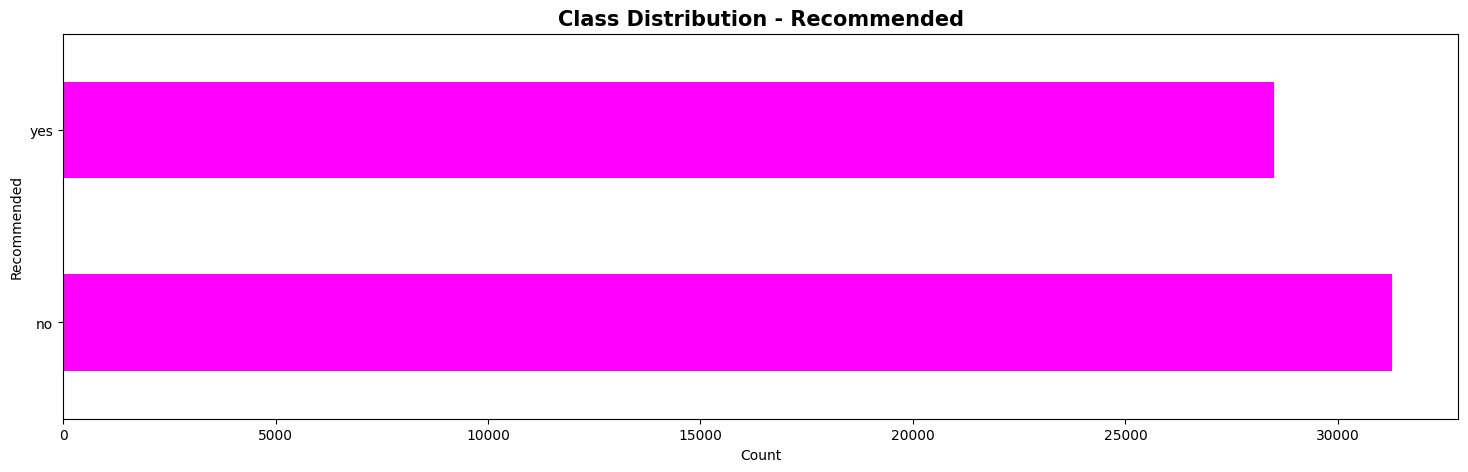

In [24]:
# plotting barh graph to identify classes of dependent feature
plt.figure(figsize=(18,5))
df['recommended'].value_counts().plot(kind='barh', color='magenta')
plt.title('Class Distribution - Recommended', fontsize=15, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Recommended')

plt.show()


*   **We can see from the picture that the consensus of understanding has an almost equal quality about yes and no.**
*   **This shows that some people generally do not recommend the airline service, but some people do like it.**

In [25]:
df['date_flown'].array

<PandasArray>
[datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0),
 datetime.datetime(2019, 5, 1, 0, 0),                        'April 2019',
 datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0),
                        'April 2019',                        'April 2019',
                        'April 2019',                     'February 2019',
 ...
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan,
                                 nan,                                 nan]
Length: 61183, dtype: object

In [26]:
# Changing the date_flown column from string to datetime formate
df['date_flown']=df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [27]:
# Creating new feature to store month
df['travel_month']=df['date_flown'].dt.month

In [28]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

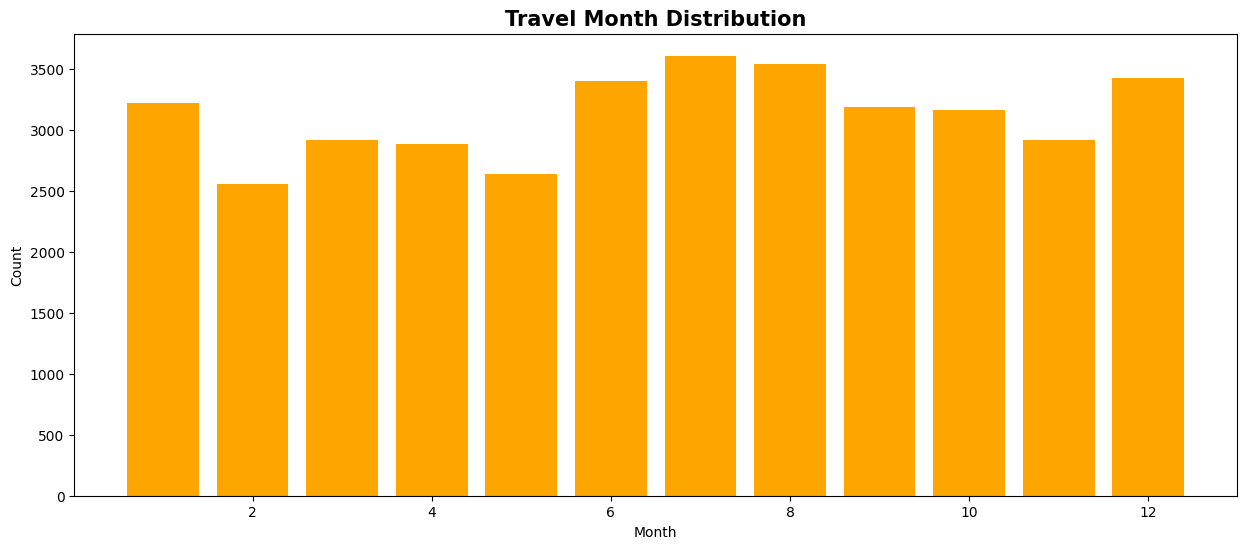

In [29]:
# bar plot of travel_month feature
plt.figure(figsize=(15,6))
plt.bar(df['travel_month'].value_counts().index, df['travel_month'].value_counts(),color='orange')
plt.title('Travel Month Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

**From the graph**

*   **We can see that July is the most popular month for airline passengers and February is the least traveled month.**

*   **We can conclude that after June, people like to travel by plane, and from February to May, they do not prefer to travel by plane.**

###**Relation of Overall Ranting of airlines and review features**

In [30]:
# function for stacked plot for rating feature
def rating_features(r):
  x=df.groupby([df['overall']])
  x[r].value_counts().unstack().plot(kind='barh',stacked=True,figsize=(18,7))


In [31]:
review_feat=['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

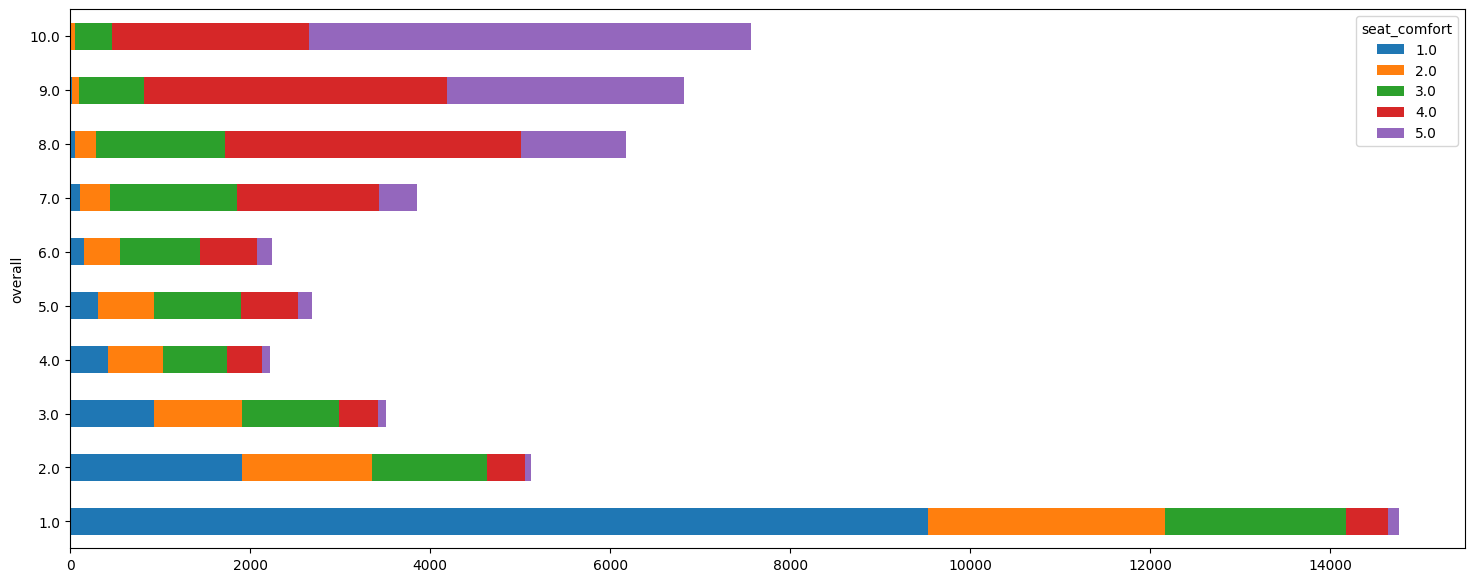

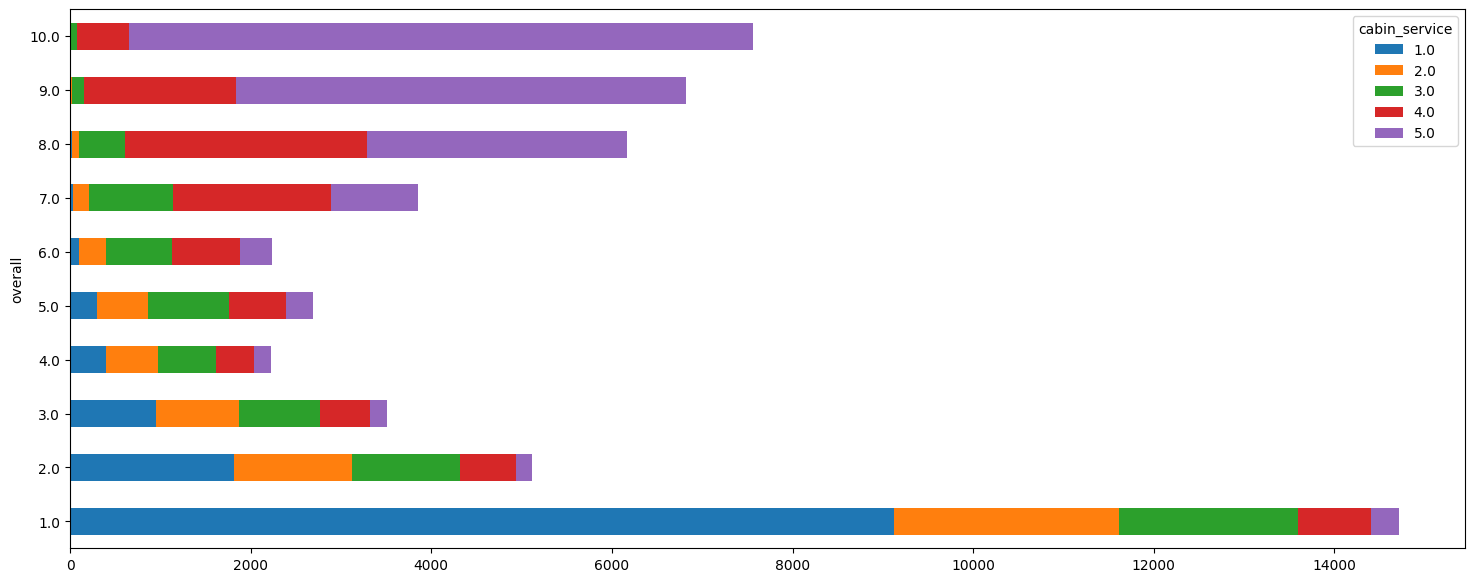

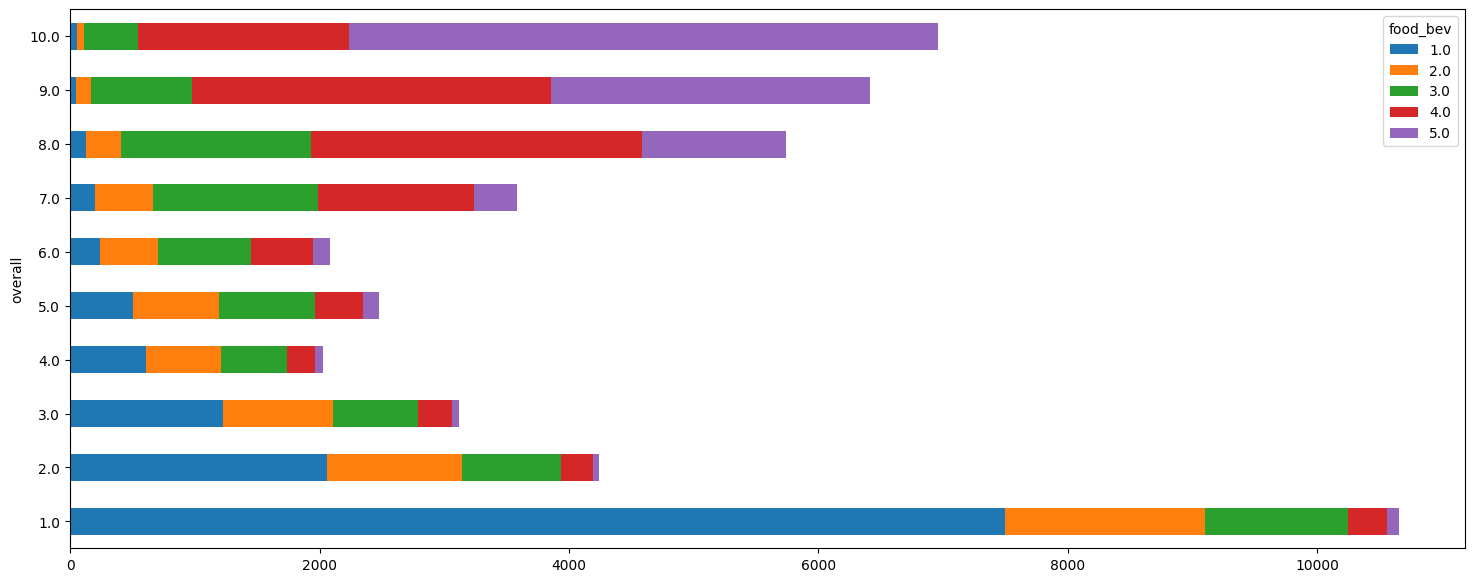

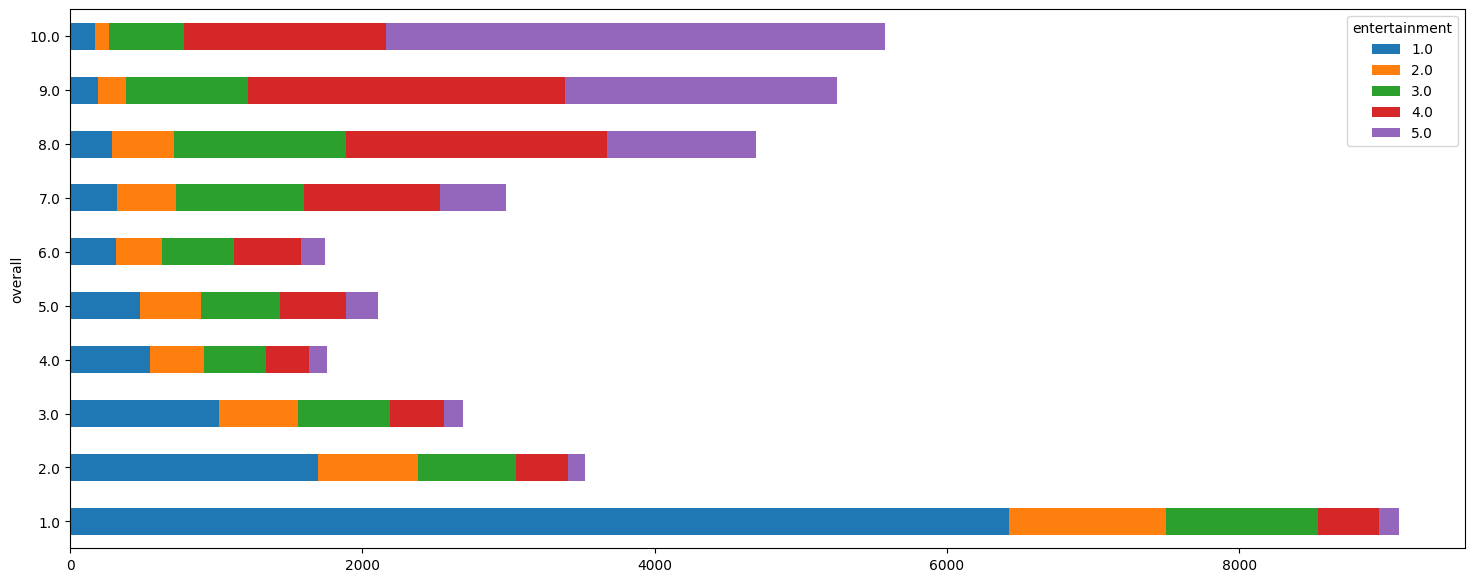

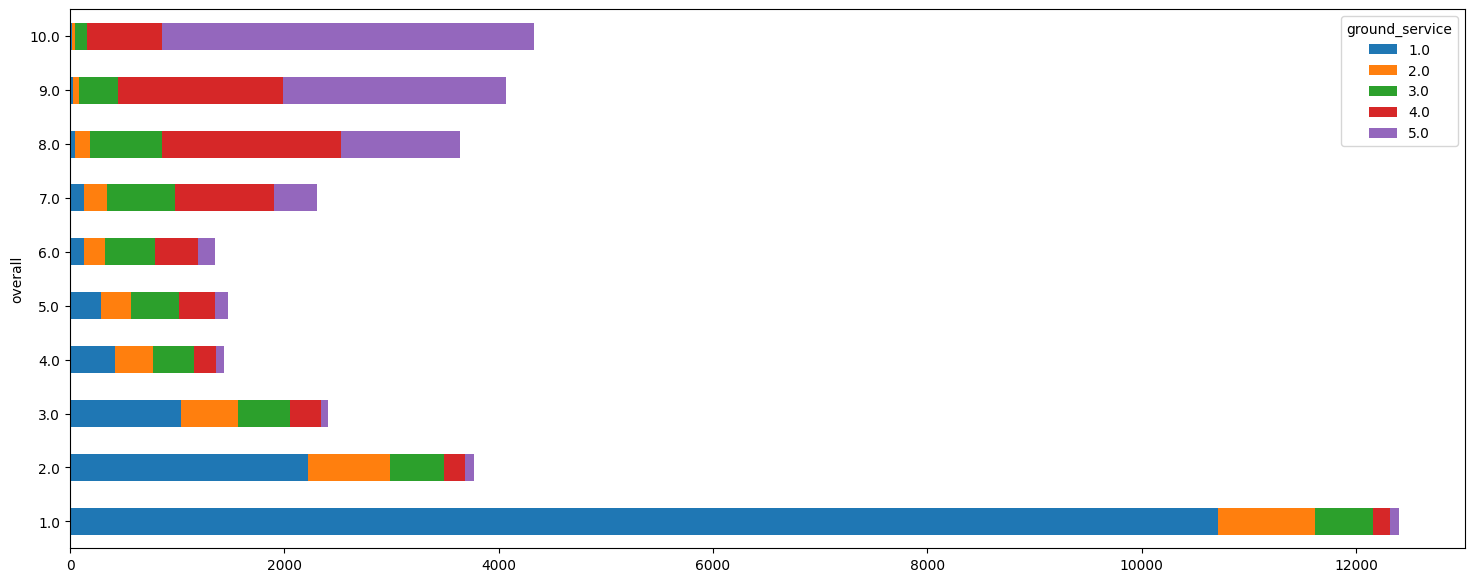

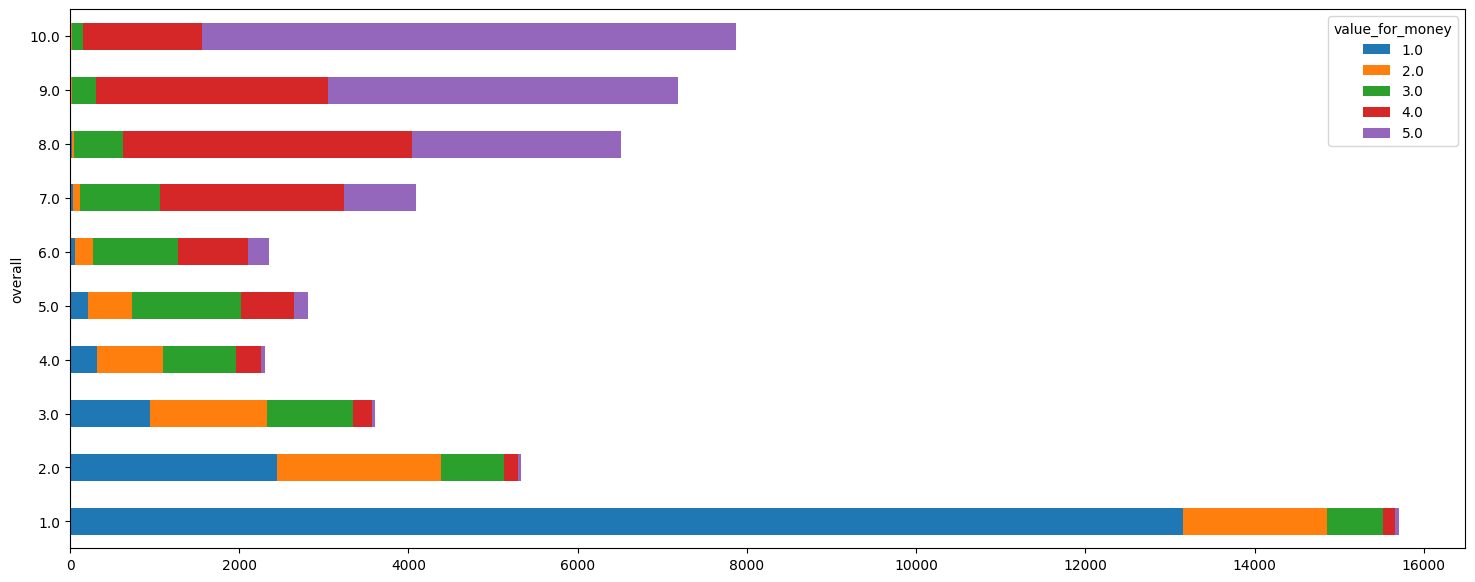

In [32]:
# get stacked plot for review feat
for r in review_feat:
  rating_features(r)

**From the above  Graph**



*   **we can conclude that when all ratings of the aircraft are good (10.0 or 9.0 in the 10 range)
is for all features (like "seat_comfort", "cabin_service", "meal_bev", "entertainment.", "ground_service") , "value_money" is high (usually in the range of 5.0 or 4.0).**

*   **When the overall rating of the aircraft is low (1.0, 2.0 out of 10), all inspection features are also rated low.**
*   **This shows that the review has a positive impact on the assessment of the overall rating of the airline, obviously it has a significant impact on the airline industry.**

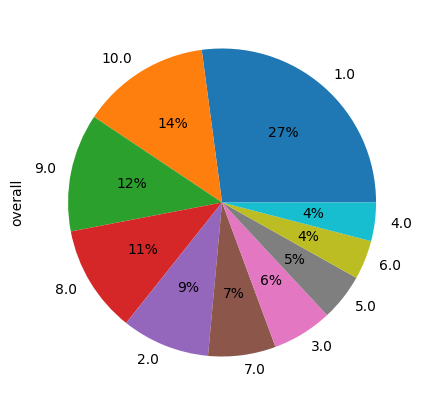

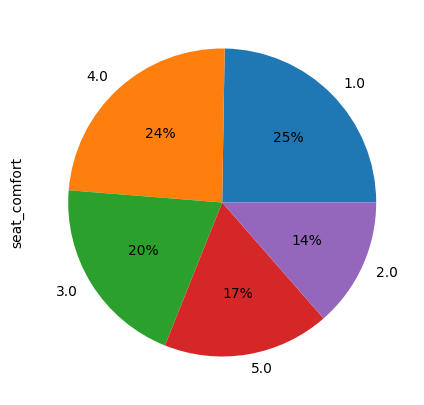

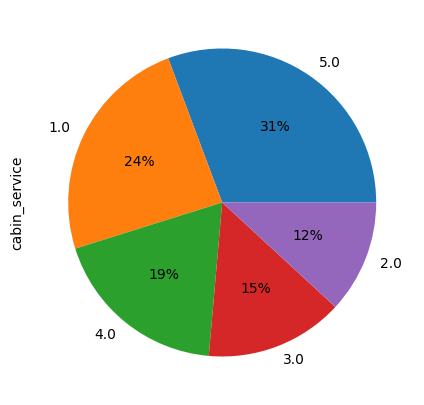

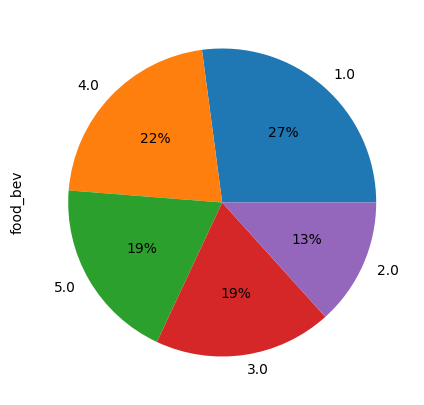

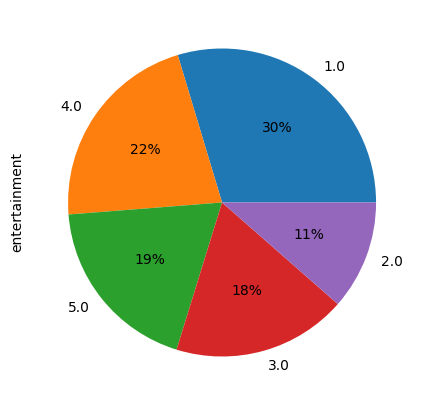

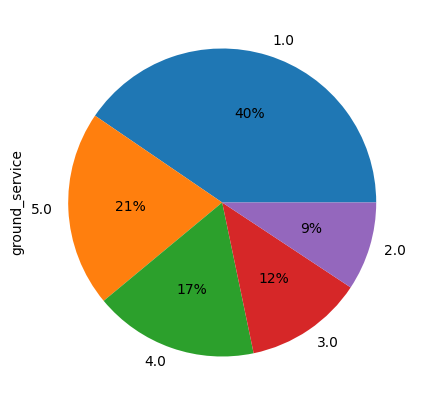

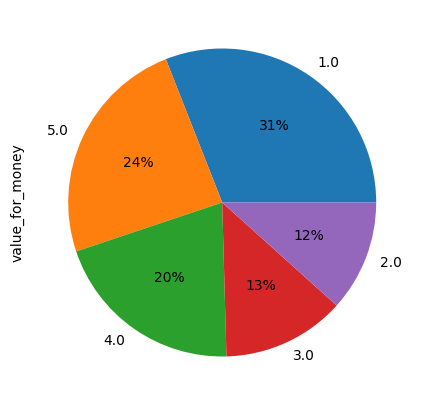

In [33]:
# Get the percentage distribution of passanger with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  ax = fig.gca()
  df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')

**From above the graph, we can see ---**


*   **44% of passengers rate the service provided by the airline with a score of 7 out of 10 or more. This shows that some of the population finds the service provided by the aircraft good.**

*   **25% of passengers are not satisfied with the seat. 31% of passengers were satisfied with the in-flight service.**

*   **While 41% of the passengers were satisfied with the food and beverage services, 30% did not like the entertainment services offered.**
*    **40% of passengers do not like ground handling services and 44% think that this trip is worth the money.**


*   **The airlines' value for money, food, entertainment, etc. We can conclude that they need to work hard to improve their services. Otherwise, the airline industry will be adversely affected in a short time.**





In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  seat_comfort     56211 non-null  float64       
 11  cabin_service    56240 non-null  float64       
 12  food_bev         48341 non-null  float64       
 13  entertainment    40230 non-null  float64       
 14  ground_service   37169 non-null  floa

##**The Feature description is briefly as follows:**


*   **airline**: Name of the airline in str format.

*   **overall**:Overall point is given to the trip between 1 to 10 in float format.


*   **author**: Author of the trip in str format.


*   **reviewdate**: Date of the Review customer review: Review of the customers in free text formate in str need to be converted into Datetime format.



*  **aircarft**: Type of the aircraft in str format.

*   **travellertype**: Type of traveler (e.g. business, leisure) consist of four class in str format.


*   **cabin**: Cabin at the flight date flown: Flight date in str format consist of 4 class.

*  **seatcomfort**: Rated between 1-5 in float format.


*   **cabin service**: Rated between 1-5 in float format.

*   **foodbev**:  Rated between 1-5 entertainment: Rated between 1-5 in float format.


*   **groundservice**: Rated between 1-5 in float format.


*   **valueformoney**: Rated between 1-5 in float format.

##**Feature Engineering**

In [35]:
num_df=df[['overall', 'seat_comfort', 'cabin_service', 'food_bev','entertainment', 'ground_service', 'value_for_money']]

##**To fill the null values using KNM**



In [36]:
# filling null values with KNM IMPUTER
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) #n_neigbhour defines no of datapoints includes closer to the missing values
num_df=pd.DataFrame(imputer.fit_transform(num_df),columns=num_df.columns)

In [37]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          61183 non-null  float64
 1   seat_comfort     61183 non-null  float64
 2   cabin_service    61183 non-null  float64
 3   food_bev         61183 non-null  float64
 4   entertainment    61183 non-null  float64
 5   ground_service   61183 non-null  float64
 6   value_for_money  61183 non-null  float64
dtypes: float64(7)
memory usage: 3.3 MB


In [38]:
df = df.drop(columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev','entertainment', 'ground_service', 'value_for_money'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   author           61183 non-null  object        
 2   review_date      61183 non-null  object        
 3   customer_review  61183 non-null  object        
 4   aircraft         18488 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   recommended      59761 non-null  object        
 10  travel_month     37434 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 5.6+ MB


**Now we have to add two non-null dataframe**

In [40]:
df2=pd.concat([df.reset_index(), num_df.reset_index()],axis=1)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            61183 non-null  int64         
 1   airline          61183 non-null  object        
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  object        
 4   customer_review  61183 non-null  object        
 5   aircraft         18488 non-null  object        
 6   traveller_type   37540 non-null  object        
 7   cabin            58705 non-null  object        
 8   route            37513 non-null  object        
 9   date_flown       37434 non-null  datetime64[ns]
 10  recommended      59761 non-null  object        
 11  travel_month     37434 non-null  float64       
 12  index            61183 non-null  int64         
 13  overall          61183 non-null  float64       
 14  seat_comfort     61183 non-null  float

In [42]:
df2 = round(df2.select_dtypes(include=['object','float64']))

In [43]:
df2.head().T

,0,1,2,3,4
airline,Turkish Airlines,Turkish Airlines,Turkish Airlines,Turkish Airlines,Turkish Airlines
author,Christopher Hackley,Adriana Pisoi,M Galerko,Zeshan Shah,Pooja Jain
review_date,8th May 2019,7th May 2019,7th May 2019,6th May 2019,6th May 2019
customer_review,âœ… Trip Verified | London to Izmir via Istanb...,âœ… Trip Verified | Istanbul to Bucharest. We ...,âœ… Trip Verified | Rome to Prishtina via Ista...,âœ… Trip Verified | Flew on Turkish Airlines I...,âœ… Trip Verified | Mumbai to Dublin via Istan...
aircraft,NaN,NaN,NaN,A330,NaN
traveller_type,Business,Family Leisure,Business,Solo Leisure,Solo Leisure
cabin,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class
route,London to Izmir via Istanbul,Istanbul to Bucharest,Rome to Prishtina via Istanbul,Washington Dulles to Karachi,Mumbai to Dublin via Istanbul
recommended,yes,no,no,yes,no
travel_month,5.0,5.0,5.0,4.0,5.0


* **Here we can see that the appropriate values are filled.**



In [44]:
#replacing yes=1 and no=0 in recommended column
df2['recommended'].replace ({'yes':1,'no':0},inplace=True)

**Here we are replacing positive recommendation with 1 and negative with 0**

##**Checking correlation**

In [45]:
#check the correlation
corr=df2.corr()
corr.style.background_gradient(cmap='cividis')


,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
recommended,1.000000,-0.004002,0.898390,0.719521,0.756843,0.736565,0.668660,0.797478,0.837220
travel_month,-0.004002,1.000000,-0.004173,0.000088,-0.005573,-0.002793,-0.015751,-0.004096,-0.007617
overall,0.898390,-0.004173,1.000000,0.791971,0.820029,0.803981,0.740649,0.881449,0.896356
seat_comfort,0.719521,0.000088,0.791971,1.000000,0.708728,0.725471,0.708497,0.719685,0.758560
cabin_service,0.756843,-0.005573,0.820029,0.708728,1.000000,0.776758,0.666898,0.747785,0.764541
food_bev,0.736565,-0.002793,0.803981,0.725471,0.776758,1.000000,0.729318,0.716689,0.763086
entertainment,0.668660,-0.015751,0.740649,0.708497,0.666898,0.729318,1.000000,0.671103,0.706957
ground_service,0.797478,-0.004096,0.881449,0.719685,0.747785,0.716689,0.671103,1.000000,0.822223
value_for_money,0.837220,-0.007617,0.896356,0.758560,0.764541,0.763086,0.706957,0.822223,1.000000




*   **Overall and Recommended are highly correlated**
*   **Overall and value for money are highly correlated**





In [46]:
#features present in dataset
features=df2.columns
features

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended', 'travel_month',
       'overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [47]:
features2 = features.drop(['airline','author','aircraft','review_date','customer_review','route','recommended'])

traveller_type


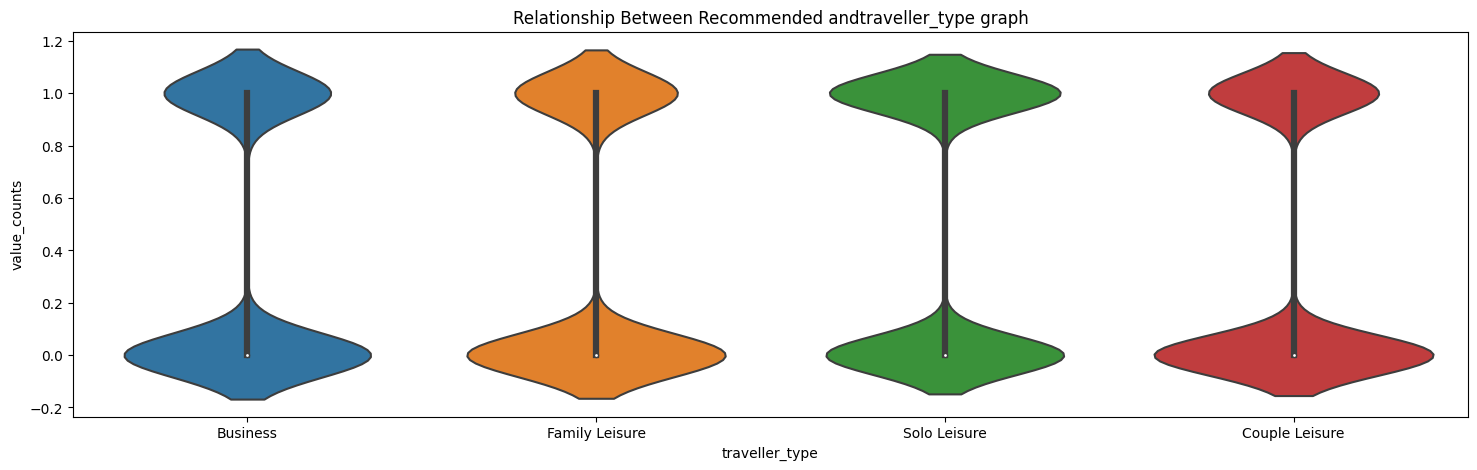

cabin


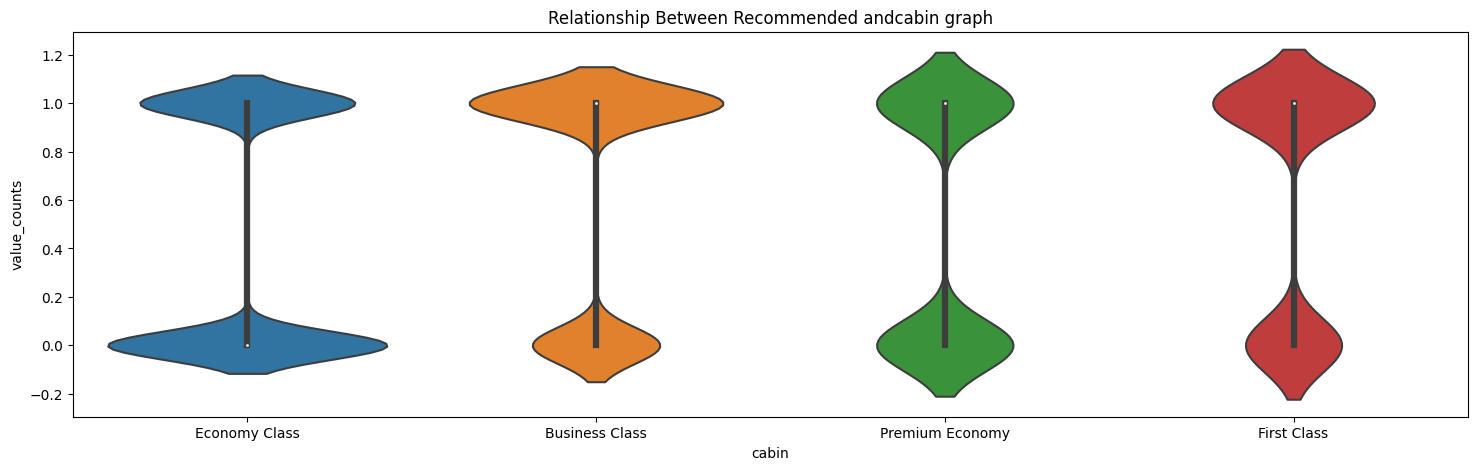

travel_month


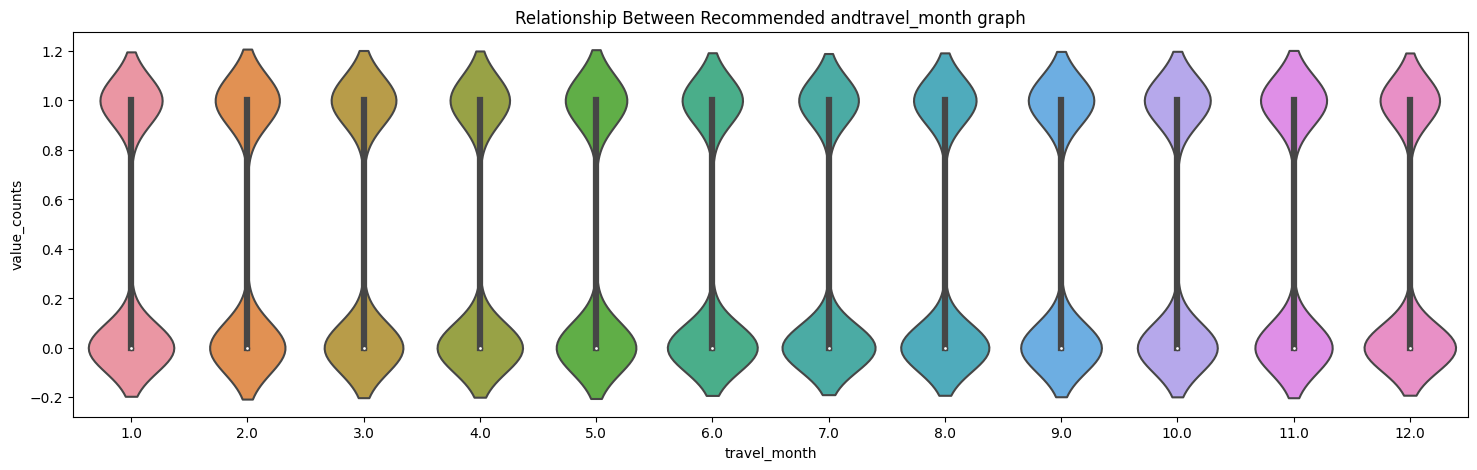

overall


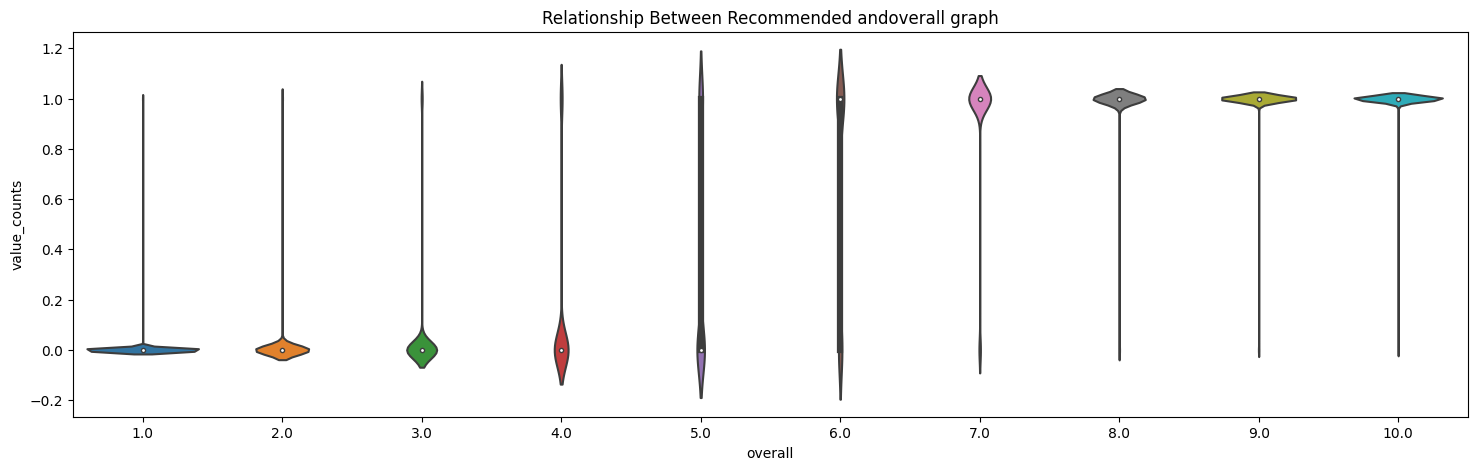

seat_comfort


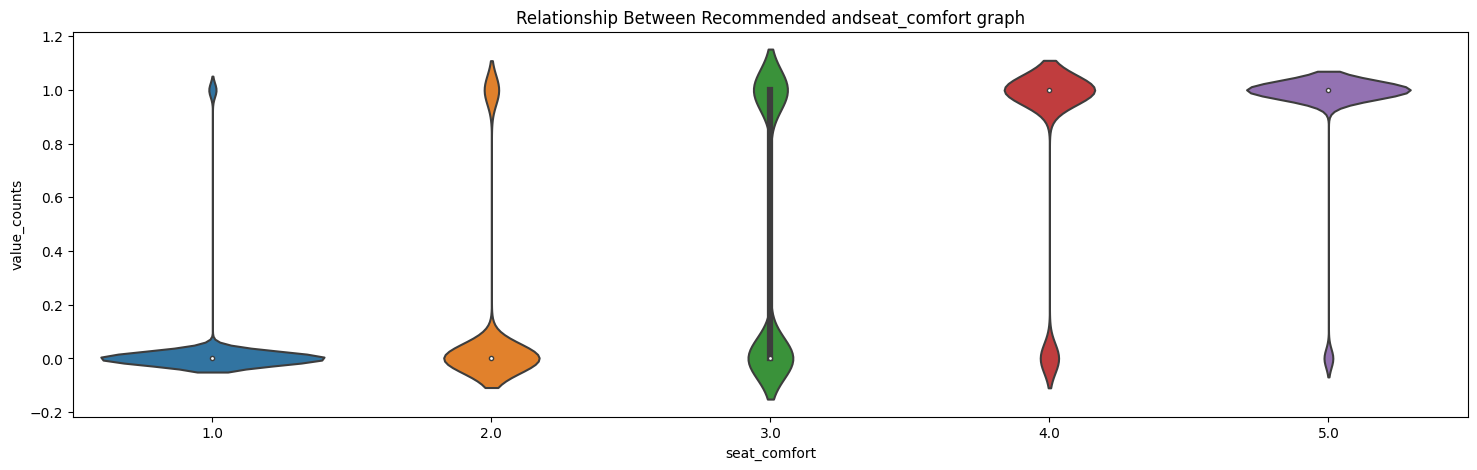

cabin_service


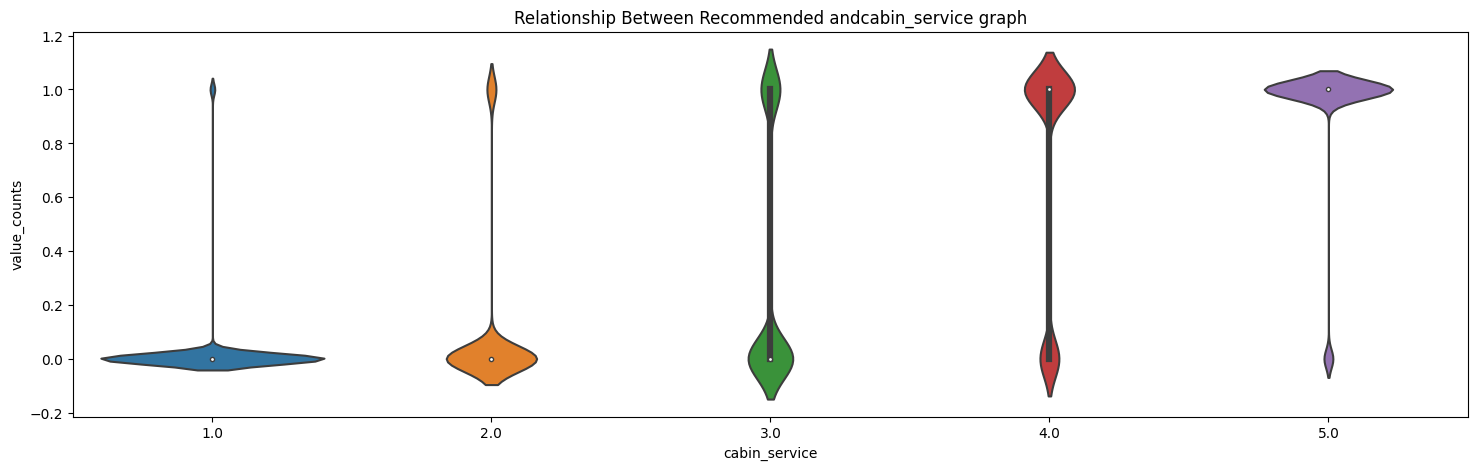

food_bev


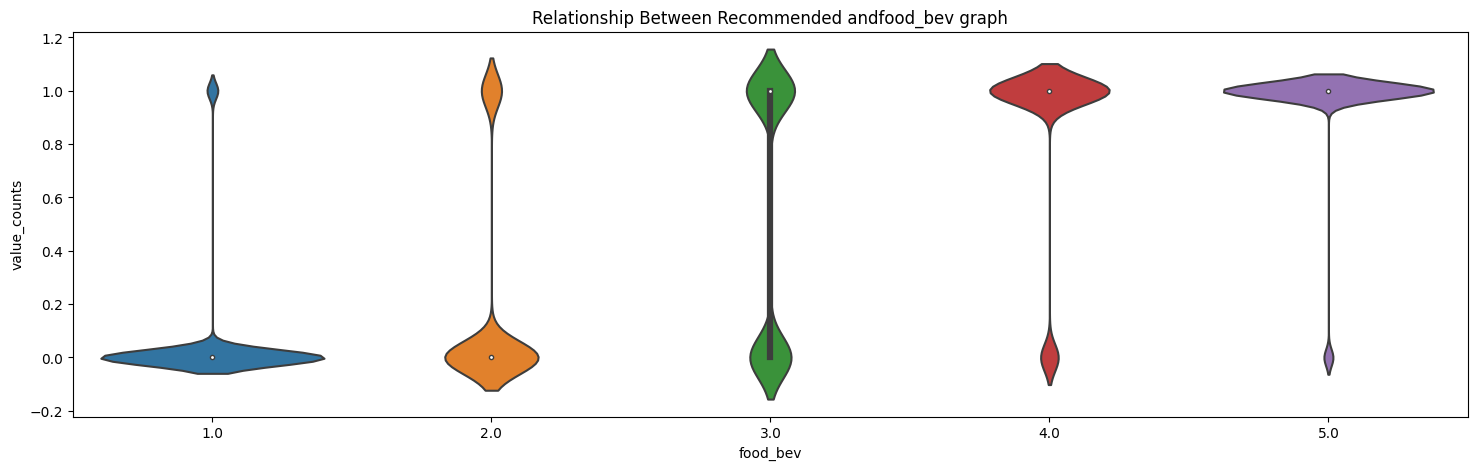

entertainment


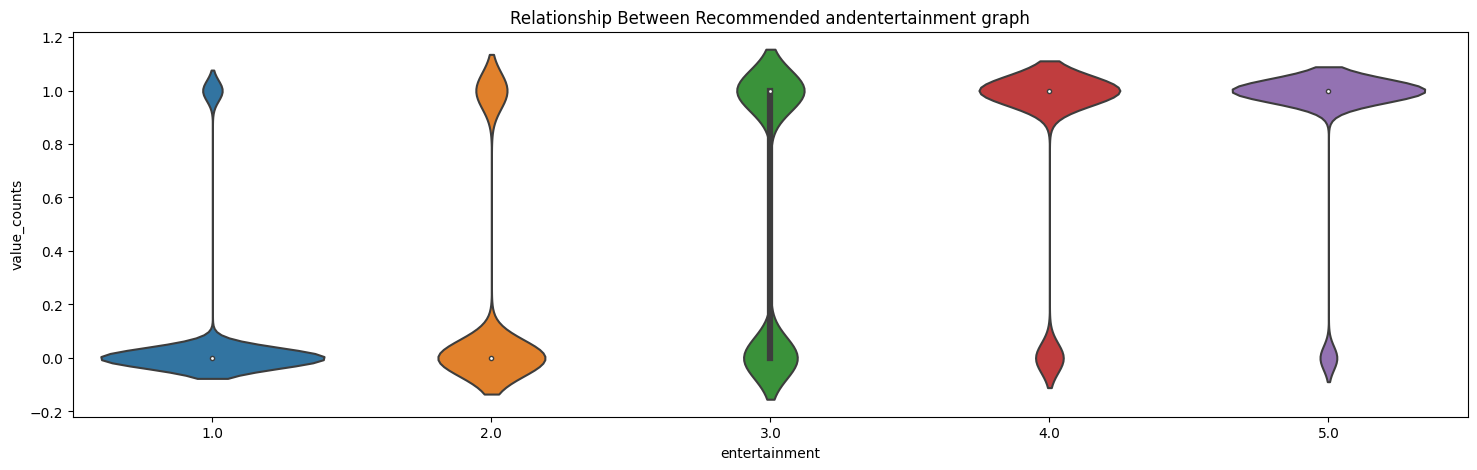

ground_service


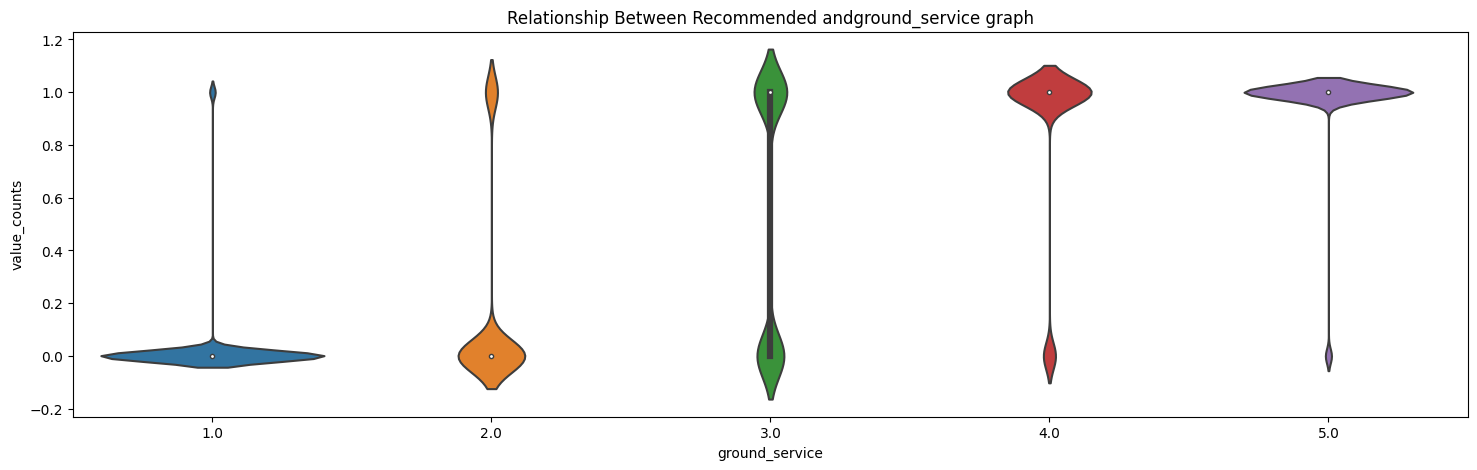

value_for_money


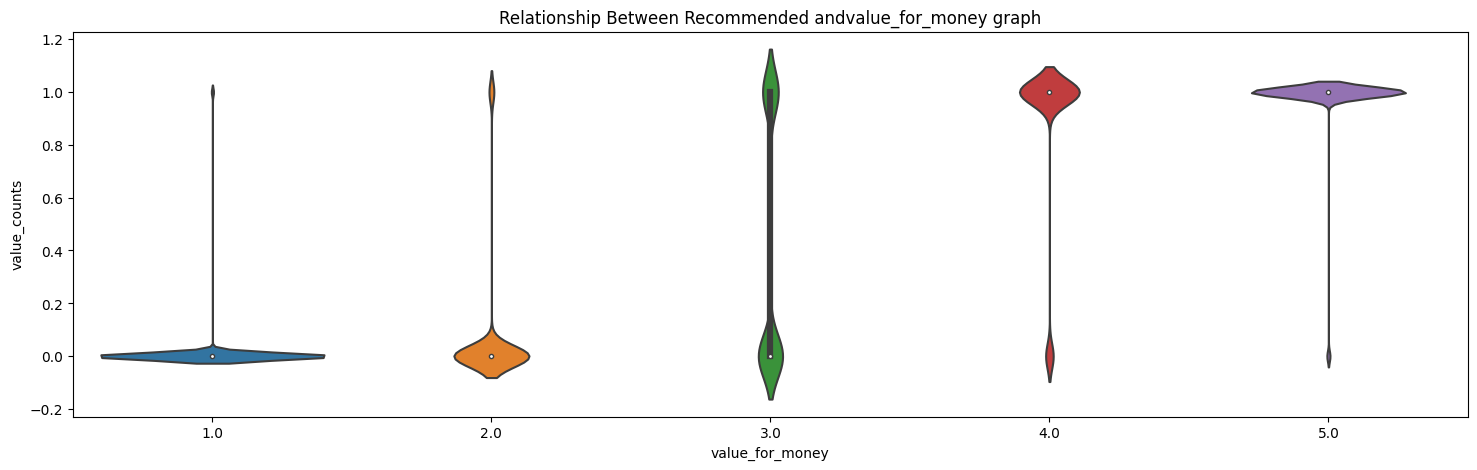

In [48]:
for i in features2:
  print(i)
  plt.figure(figsize=(18,5))
  sns.violinplot(x=i, y='recommended', data=df2)
  plt.title(f"Relationship Between Recommended and{i} graph", )
  plt.xlabel(i)
  plt.ylabel("value_counts")
  plt.show()

**From the above we can draw the following conclusions**



*   **We can see that people give both a 1 and a 0, and from now on we'll treat that as the pros and cons of the deal so it's well defined as a stand-alone action exercise. This may be due to poor infrastructure or services, and good referrals may be due to low cost per person. However, this is a statistical estimate based on the data presented.**

*   **We can also see people making recommendations for the building's business class. From this we can conclude that people like to travel in business class because the price is low, similarly we can see that people give the highest recommendation for business learning rooms, perhaps because of less infrastructure or services provided to them.**
*  **We can also see that people who offer business class are the most recommended, probably because of the good service they provide, and recommendations are equal for business class travel due to high or low prices.**


*   **Month to month testimony. According to the positive and negative comments, we can see that most people travel in July. From the
overall agreement picture, we can see that it is perfectly understandable to give a negative agreement to the overall rating of 1.
0 points, 10 points highly recommended. But with a maximum score of 1.0 this is a real concern.**



*   **people gave the Class 5 seat the best recommendation for a comfortable seat and the worst recommendation for this chair. We can also see that group 1 chairs received the most negative feedback compared to positive feedback.
From here we conclude that it should be removed as soon as possible.**

*   **Cabin Service Rating People give the top 5 reviews for Cabin Service Rating compared to peers. From this we can conclude that the home service works well.people gave the highest approval 1.0 for food and drink.**
*   **Speaking of entertainment, we can see that most people give entertainment 1 the highest recommendation, which indicates that airlines need to improve their entertainment as well.**

*   **Regarding ground handling, we see that the majority gives the highest recommendation for ground handling services as 1, which indicates that companies need to improve ground handling services.**
*   **In terms of value for money, we can see that the majority give the highest recommendation for the price of 1, suggesting that airlines need to improve their service with better flight.**





traveller_type


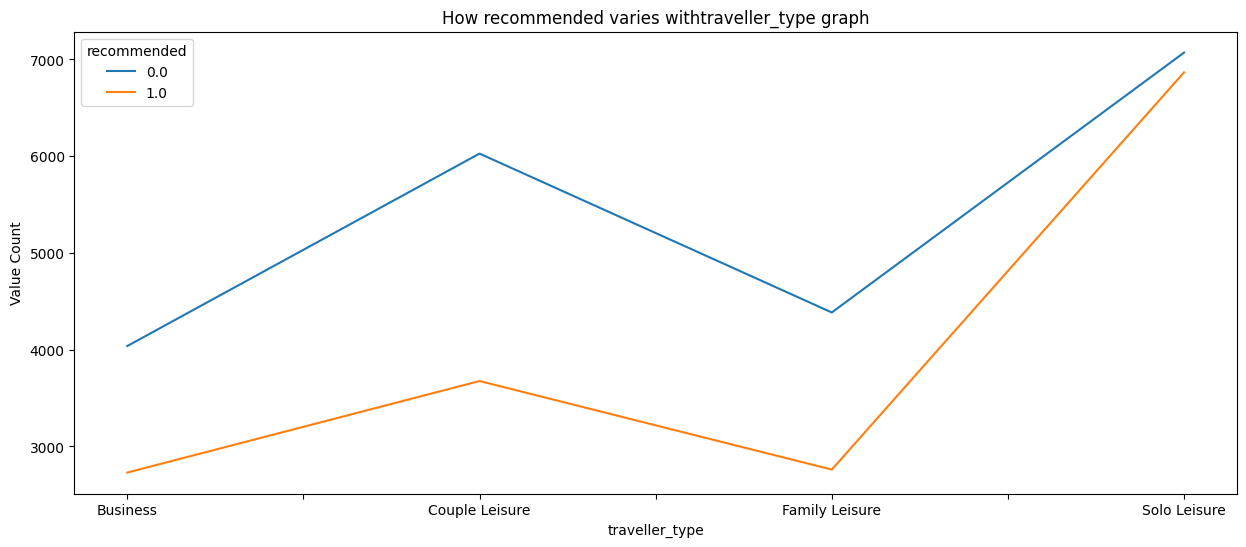

cabin


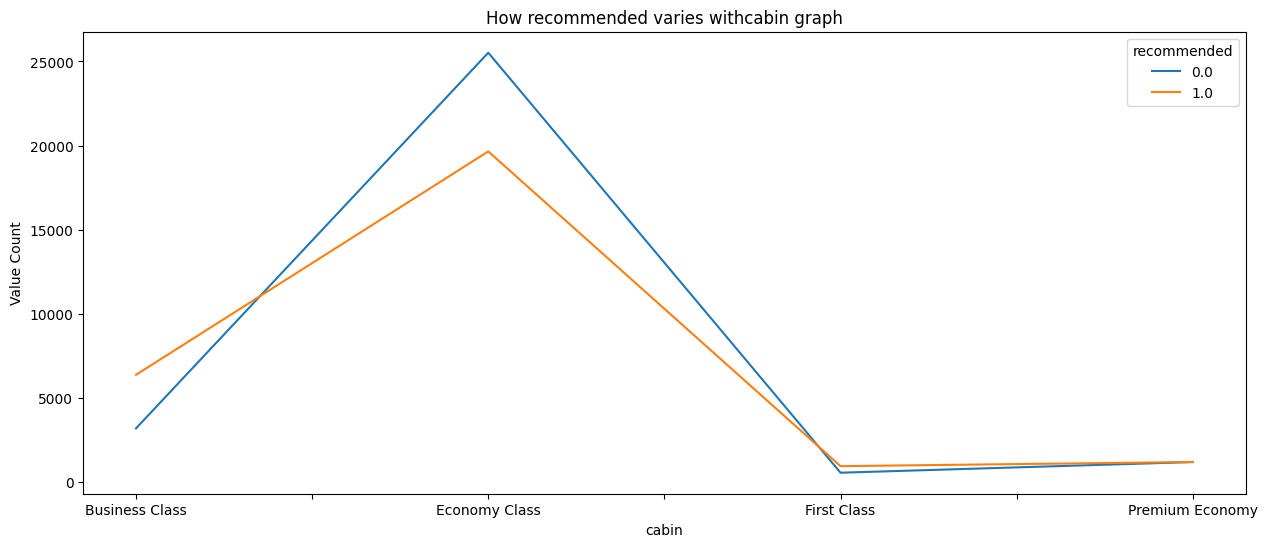

travel_month


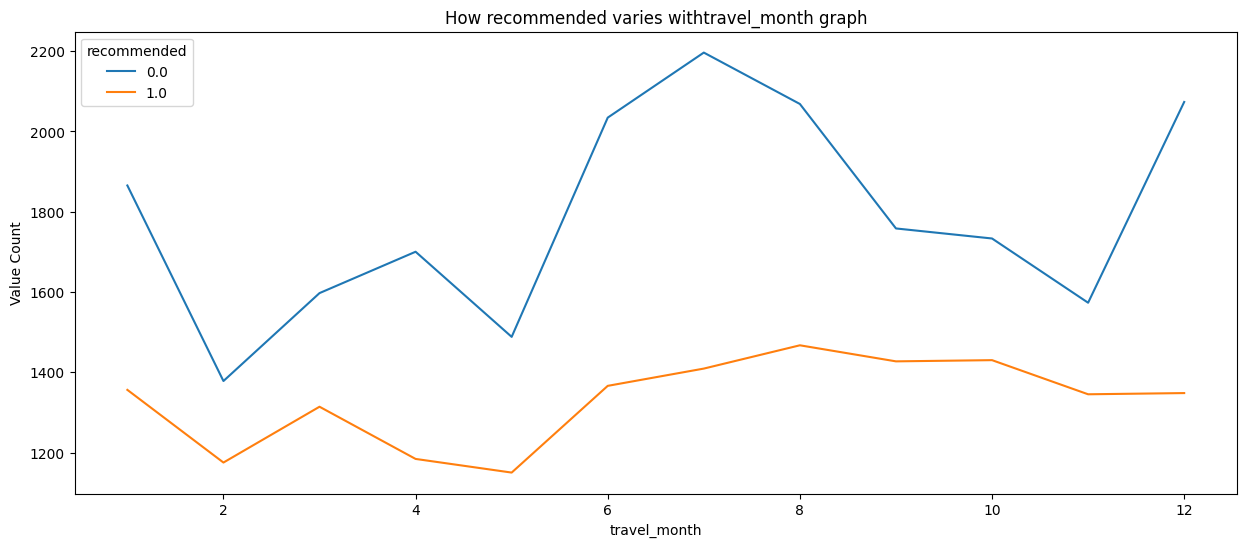

overall


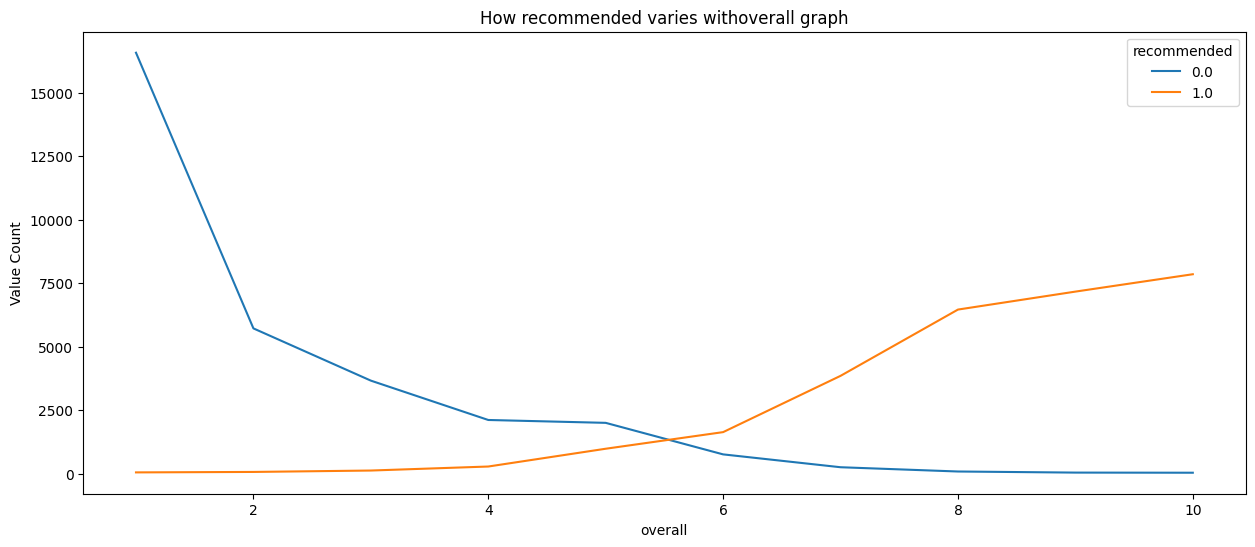

seat_comfort


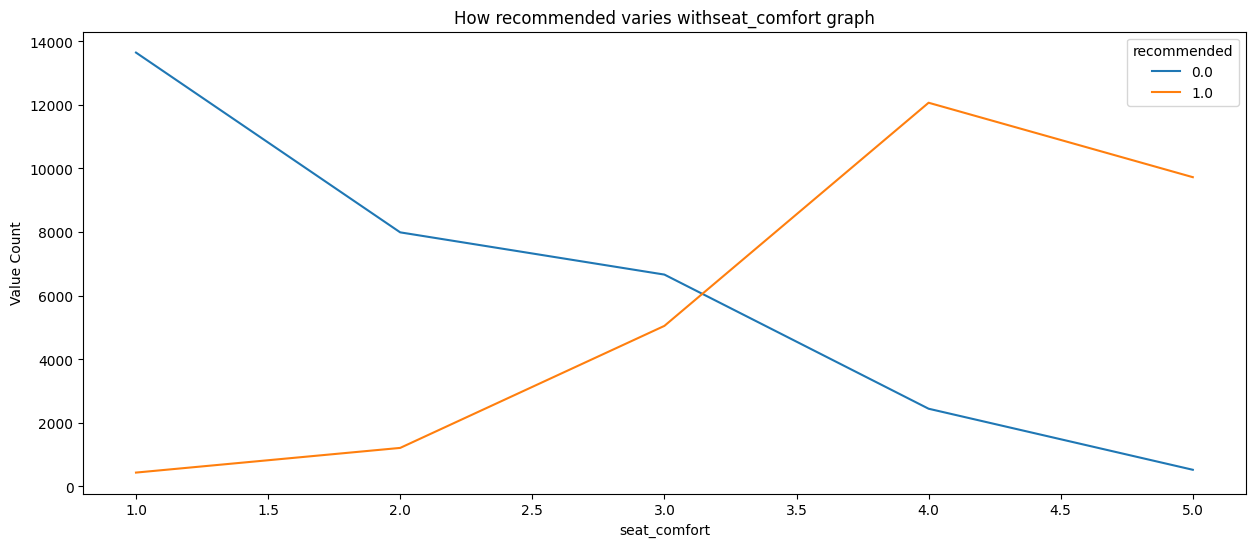

cabin_service


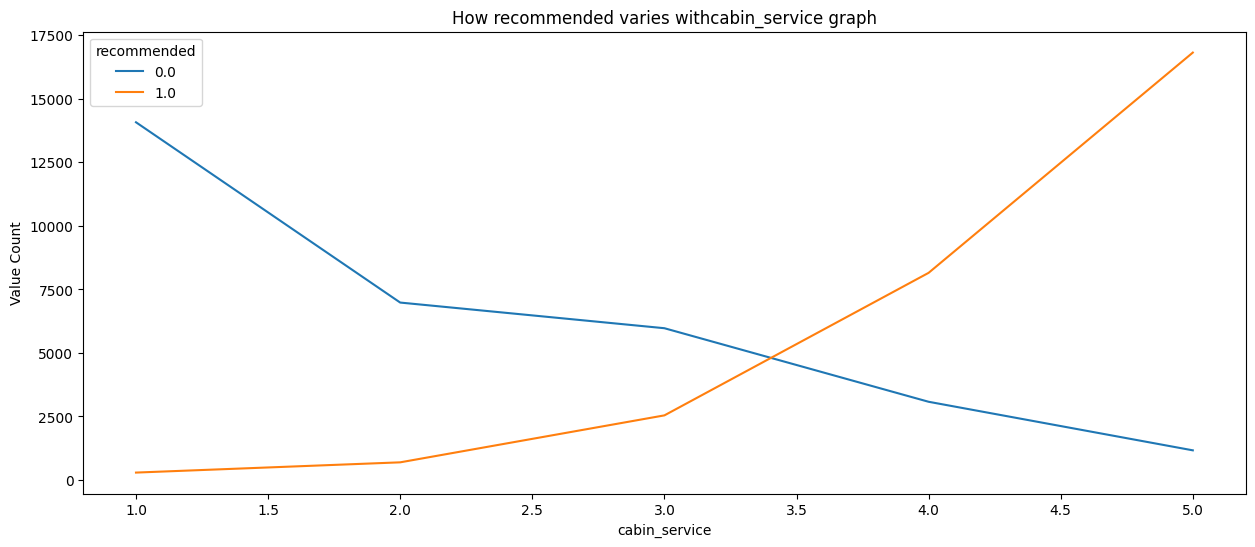

food_bev


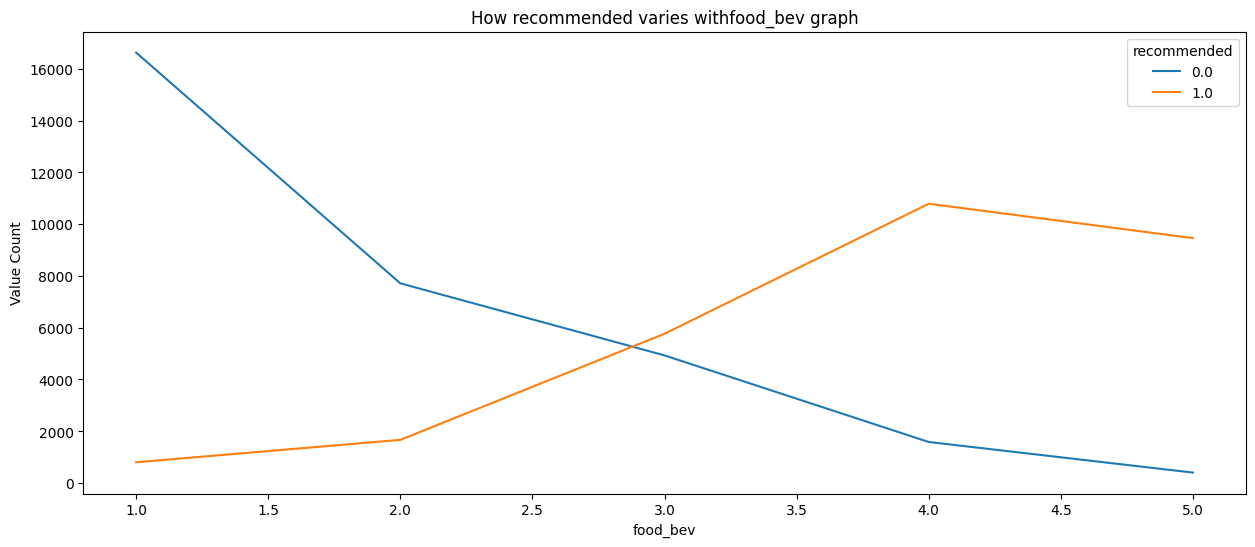

entertainment


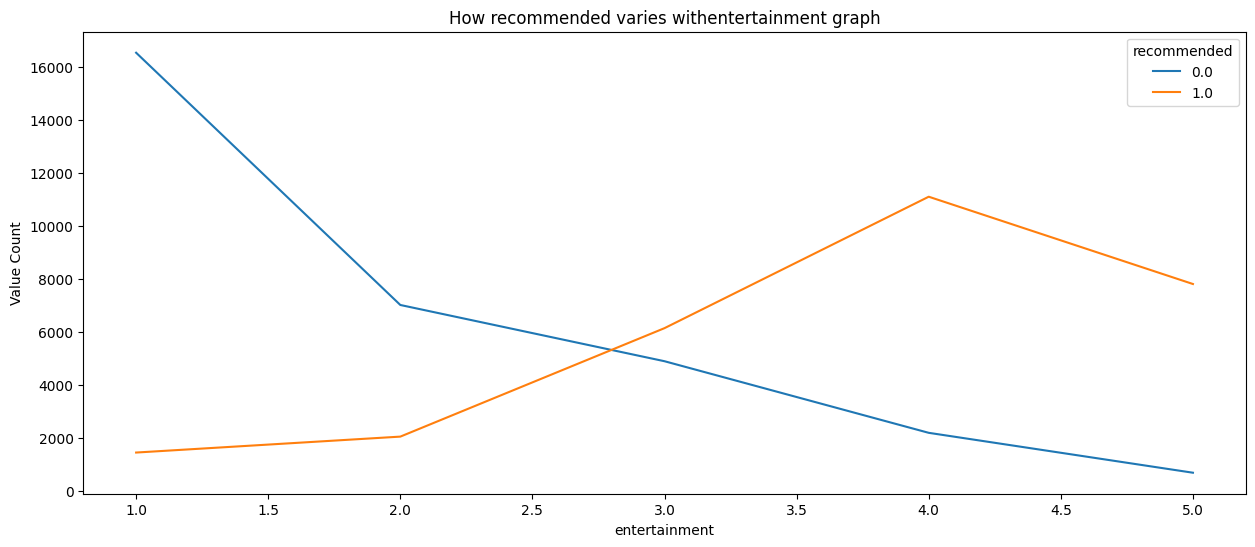

ground_service


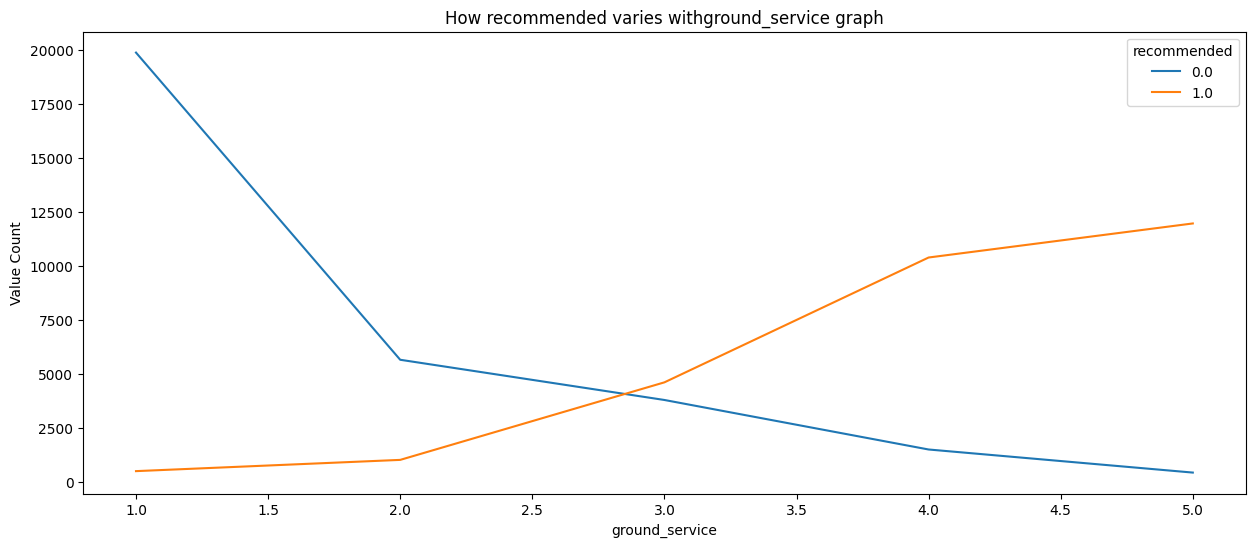

value_for_money


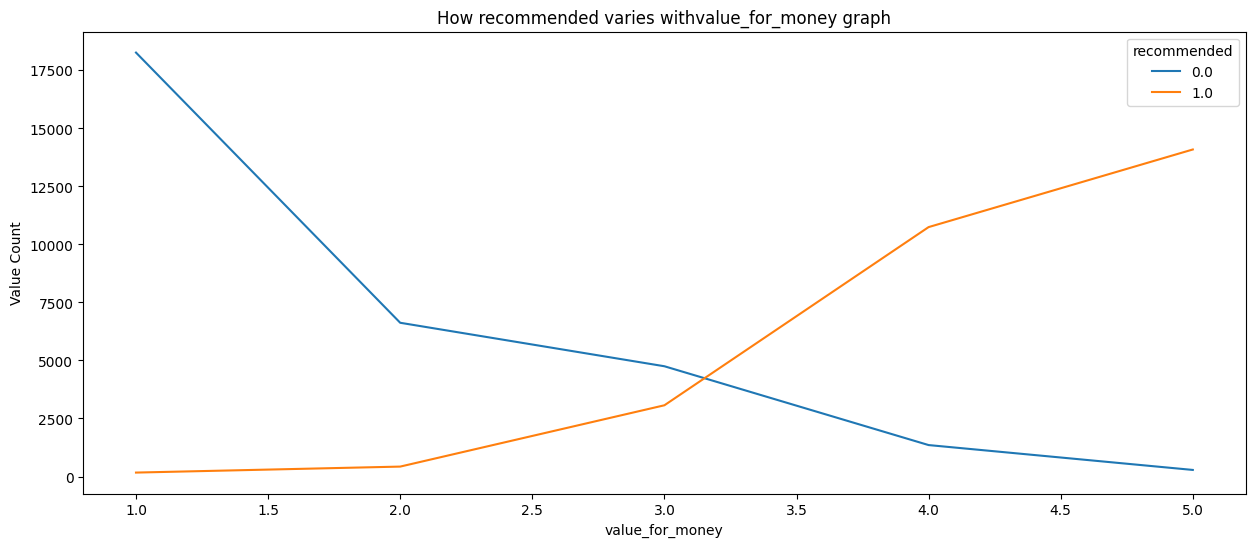

In [49]:
#ploting line grapgh of count of feature groupe by target variable to analyze the trend
for feature in features2:
  print(feature)
  df2.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6))
  plt.title(f'How recommended varies with{feature} graph')
  plt.ylabel('Value Count')
  plt.xlabel(feature)
  plt.show()



*   **In the type of travel, both positive and negative, we see an increase in couples going on vacation from work, while family decreases and then gradually increases alone. This shows that people like to relax alone more than other pastimes.**

*   **In the cabin type, we can see the increase in the no-no agreement from business class to business class, first class, and then a little higher in premium class. This indicates that most people fly in business class.
We do not see a change for the better in a month, but here we can conclude that people like to travel the most in July.**
*   **In the overall assessment, we can have a very good understanding of what is not normal. We can see that as the total index increases, positive comments increase, and as the total index increases, negative comments decrease.**


*   **We can see that positive comments increase as the overall rating increases in Seat Comfort, and that negative recommendations increase as the overall rating decreases, and we can see the crossover in Seat Comfort Rating 3.0, we can see similar positive and negative comments.**



*  **In home service, we can see that as the overall score increases, positive comments increase, and as the overall score increases, negative feedback decreases, we can also see the correlation For Home service 3.5, we can see positive and negative references.**

*   **We can see positive referrals increase as overall rating increases in Foodservice and negative referrals increase as overall rating decreases, we can also see Foodservice scores cross up to 3.0, we can see positive and negative testimonials.**
*   **We can see the same thing in entertainment service, positive referrals increase as the overall score increases, and negative referrals decrease as the overall score increases, we can see entertainment services between 2.5 and 3.0. Suggestions.**


*   **In Ground Handling, we can see positive referrals increase as the overall score increases and negative referrals increase as the overall score decreases, we can also see the Service floor intersection close to 3.0, we can see positive and negative referrals.**



*  **Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.**







In [50]:
#check the null value if exist
df2.recommended.isna().sum()

1422

In [51]:
df2.tail()

,airline,author,review_date,customer_review,aircraft,traveller_type,cabin,route,recommended,travel_month,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
61178,Ukraine International,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61179,Ukraine International,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61180,Ukraine International,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61181,Ukraine International,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0
61182,Ukraine International,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,0.0,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0


In [52]:
#dropping redundant feature which are not required
df2.drop(['author','aircraft','review_date','route','travel_month'],axis=1,inplace=True)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61183 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   customer_review  61183 non-null  object 
 2   traveller_type   37540 non-null  object 
 3   cabin            58705 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          61183 non-null  float64
 6   seat_comfort     61183 non-null  float64
 7   cabin_service    61183 non-null  float64
 8   food_bev         61183 non-null  float64
 9   entertainment    61183 non-null  float64
 10  ground_service   61183 non-null  float64
 11  value_for_money  61183 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.6+ MB


**notna() method return a Dataframe object where all the values are replaced with a Boolean value True or False.**

In [54]:
#notna() method return a DataFrame object where all the values are replaced with a Boolean Value True or False
df2 = df2[df2['recommended'].notna()]

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 0 to 61182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   customer_review  59761 non-null  object 
 2   traveller_type   37539 non-null  object 
 3   cabin            58704 non-null  object 
 4   recommended      59761 non-null  float64
 5   overall          59761 non-null  float64
 6   seat_comfort     59761 non-null  float64
 7   cabin_service    59761 non-null  float64
 8   food_bev         59761 non-null  float64
 9   entertainment    59761 non-null  float64
 10  ground_service   59761 non-null  float64
 11  value_for_money  59761 non-null  float64
dtypes: float64(8), object(4)
memory usage: 5.9+ MB


**Here we can see that there are 59761 rows and 12 columns. We can also see that there are 8 floating objects and 4 positive objects.**

##**NLP(Natural Language Processing) for reviews**
**In NLP we use vander theory to convert opinions from customer reviews into scores for predictive models.**

In [56]:
# Install vaderSentiment package
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.8 MB/s eta 0:00:00


In [57]:
#Import Sentiment Intensity Analyzer Class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [58]:
#Create function to get sentiment score for review
def sentiment_score(s):
  #create SentimentIntensityAnalyzer object
  sia_object=SentimentIntensityAnalyzer()
  #scoring each reviews depending on their polarity
  sentiment_dict=sia_object.polarity_scores(s)
  return sentiment_dict['compound']

**We have also created new feature numeric reviews so to store sentiment score wehave retrived using sentiment analysis from customer review feature.**



In [ ]:
#creatic numeric review column to find and store the polarity of each customer review
df2['numeric_review']=df2['customer_review'].apply(sentiment_score)

In [ ]:
df2.info()

In [ ]:
#check the correlation
corr=df2.corr()
corr.style.background_gradient(cmap='cividis')

**recommended,ground-service, value for money in relation with overall give good correlation.**

In [ ]:
#Dropping Customer Review to Replace With Numeric Review.
df2.drop('customer_review',axis=1,inplace=True)
df2.info()

**Now we replace the customer_review column with the numeric_review column. We still have 59761 rows, 9 floating point types, 3 data objects.**

##**One Hot Encoding For Categorical Features**

In [ ]:

# categorical features to do one hot encoding
cat_col=['airline','cabin','traveller_type']

In [ ]:
dummy=pd.get_dummies(df2,columns=cat_col,drop_first=False)

In [ ]:
dummy.columns

**Plane, cabin, passenger, etc. for preparing the machine learning model and further studies. we need to do one hot coding of categorical features.**

##**Lets's Split the Data to Train and Test**

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split

In [ ]:
#getting the independent variables
X=dummy.drop('recommended',axis=1)
#getting the dependent variables
y=dummy['recommended']


In [ ]:
#performance train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**In model selection we first did a train and test split in 4:1 or 80:20 split with random_state=0**

In [ ]:
# Get shapes for Train and Test Set
X_train.shape,X_test.shape,y_train.shape,y_test.shape

**The final dataset was of shape (59761,97) which was split to (478058,97) as Train data and (11953,97) as Test data.**


In [ ]:
column = ['Model','Accuracy','Recall','Precision','f1-score','roc_auc_score']
evaluation_metrics_df = pd.DataFrame(columns=column)

##**Creating Function to store evaluation metrics value**

In [ ]:
# Creating Function to store evolution matrics value
def evaluation_metric(model,y_test,pred_value,metric_df):
  metric_df=metric_df.append({'Model':model,
                              'Accuracy':accuracy_score(y_test,pred_value),
                              'Recall':recall_score(y_test,pred_value),
                              'Precision':precision_score(y_test,pred_value),
                              'f1_score':f1_score(y_test,pred_value),
                              'roc_auc_score':roc_auc_score(y_test,pred_value)},ignore_index=True)
  return metric_df



*   **Confusion matrices help us understand how to adjust our estimates and whether they are consistent with actual results.**

*   **In simple terms, Precision is the ratio of Good quality to each good quality (true quality + bad quality).**

*   **Recall is a measure of how accurate our model is. (Ratio of True Positives (True Positives + False Negatives))**

*   **Accuracy is the ratio of all correct predictions to all correct predictions.**
*   **The F1 score is a compromise between Certainty and Recall. This also shows good precision and good return values.**


*   **Macro means the number of individual classes related to accuracy, memory and f1 score. We use the macro score score when we need to treat all classes equally to measure the overall performance of the system against the most common course grades.**


*   **Weighted accuracy is calculated by averaging the proportion of correct predictions in that class across all classes (ie, the number of correctly predicted samples in that class divided by all samples in that class).**




##**Logistic Regression**

**Logistic regression is a classification technique that estimates the probability of a single outcome (i.e. binary). Logistic regression produces a logistic curve with values ​​between 0 and 1.**

In [ ]:
#logistic_regression
lr=LogisticRegression(max_iter=100000)
lr.fit(X_train,y_train)
score=lr.score(X_test,y_test)
print(f'Logistic Regression Score : {score}')

In [ ]:
#model Evolution
pred_value=lr.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For Logistic Regression')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('Logistic Regression',y_test,pred_value,evaluation_metrics_df)

*  **Learning property coefficients in logistic regression to increase the probability of correctly classifying a class. For this, the best strategy is used.**
*   **Here we see that our logistic regression model has 95.64% accuracy, precision, recall, f-1 score is also high and good. That means it's a good machine learning model**


##**Decision Tree**

**Decision trees are observational techniques used to solve classification problems. Support categorical and continuous input and output variablest**

In [ ]:
#decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
print(f"Decision Tree Score {score}")

In [ ]:
#model evaluation
pred_value=dtc.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm=confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For Decision Tree')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('Decision Tree',y_test,pred_value,evaluation_metrics_df)

**Here we can see that our decision tree model has an accuracy of 93.64% and indeed remember that the f-1 score is high and good. That means it's a good machine learning model**

##**Random Forest**

**Instead of creating a tree in the CART model, we generate several trees in a random forest model. We created the tree from a bunch of old documents. These subsets may contain smaller columns and rows. Each tree assigns a class to the new object based on the attribute, and we say the tree "votes" for that class. The category with the most votes is chosen randomly.**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
score=rf.score(X_test,y_test)
print(f'Random Forest Score:{score}')

In [ ]:
pred_value = rf.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For Random Forest')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('Random Forest',y_test,pred_value,evaluation_metrics_df)

**Here we can see that our random forest model has an accuracy of 95.82% and indeed remember, the f-1 score is high and good. That means it's a good machine learning model**

##**Random Forest With GridSearchCV**

In [ ]:
#Hyperparametric Tuning to get best parameter for evaluation
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[6,8,10,12],
              'min_samples_split':[10,50,100],
              'min_samples_leaf':[30,40,50]

}

In [ ]:
# assigning grid search variable
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_dict,
                       cv = 5, verbose=2)
#Evaluting the optimal parameters
rf_grid.fit(X_train,y_train)
rf_grid.best_estimator_

In [ ]:
#getting best parameter from grid search
rf_grid.best_params_

In [ ]:
# assigning best param variable
rf_grid_best = rf_grid.best_estimator_

In [ ]:
# Model Evaluation
pred_value = rf_grid_best.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For Random Forest With GridSearchCV')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('Random Forest With GridSearchCV',y_test,pred_value,evaluation_metrics_df)

*   **The worst parameters for this grid search are max_Definition 12, min_sample_leaf 50
min_sample_split 100 and n_estimators 80. S indicates that we achieved a sampling accuracy of 95.6%.**

*   **precision, recall, f-1 scores are high and good. That means it's a good machine learning model**

##**Support Vecor Machine**

**SVM (Support Vector Machine) SVM takes a direct approach to binary classification by trying to find the "best" hyperplane separating two classes in a given domain**

**In practice, however, it is difficult (if not impossible) to find a general plane that separates the entire class using only these features. DVMs solve this problem by introducing the idea of ​​separating hyperplanes in two different ways.**

**Extend the feature space to the point where perfect separation of classes is (more) likely, and (2) use pseudo-core numbers to extend the feature space. Support Vectors - the dividing line between two groups of points such that the margin between them is maximum There are many training fields almost at the edge of the margin, as shown by the black circle in the figure. The support vectors are the key points of the fit and these are called the key points of the fit.**

In [ ]:

# support vector machine using kernel as linear
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
score=svc.score(X_test,y_test)
print(f'svm score{score}')




In [ ]:
#Model Evalution
pred_value = svc.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For SVM')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('SVM',y_test,pred_value,evaluation_metrics_df)

**Here, we see that our svm model has an accuracy rate of 95.68%, in fact, the f-1 score is high and good. That means it's a good machine learning model**

##**K-nearest neighbour Model**

**K-Nearest Neighbors is a simple algorithm that collects all existing data and classifies new data or cases based on a similarity measure. It is only used to classify data points according to how their neighbors are classified.**

In [ ]:
# using knn model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
print(f'K-nearest-neighbour score : {score}')

In [ ]:
#Model Evalution
pred_value = knn.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For K-nearest-neighbour')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('K-nearest-neighbour',y_test,pred_value,evaluation_metrics_df)

**Here we see that our k-Nearest model has an accuracy rate of 95.38%, and in fact, again, the f-1 score is high and good. That means it's a good machine learning model**




##**K-nearest neighbour model with GridSearchCV**

In [ ]:
# hyperparameter tunning to get best estimator for knn
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_grid = GridSearchCV(knn, knn_params,cv=5)
knn_grid.fit(X_train,y_train)

In [ ]:
# getting best estimator
knn_grid.best_estimator_

In [ ]:
# assigining grid variable
knn_grid_best = knn_grid.best_estimator_


In [ ]:
#Model Evaluation
pred_value=knn_grid_best.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix For K-nearest neighbour model with GridSearchCV')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('K-nearest neighbour model with GridSearchCV',y_test,pred_value,evaluation_metrics_df)

**The best n_neighbors value we got is 42. The K_nearest Neighbor model has an accuracy of 95.38% and using GridSearchCV we get an accuracy of 95.58%.**

##**XGBoost Model**

**XGBoost is a distributed gradient boosting library optimized for performance, flexibility, and portability. It uses the gradient boosting paradigm to implement machine learning algorithms. XGBoost is a parallel strengthening tree (GBDT, also known as GBM) algorithm that can quickly and accurately solve many data science problems.**

In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
score=xgb_model.score(X_test,y_test)
print(f'XGBoost score :{score}')

In [ ]:
# Model Evaluation
pred_value = xgb_model.predict(X_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
sns.heatmap(cm, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Confusion Matrix ForXGBoost score')

#calling function to append evaluation metrics
evaluation_metrics_df=evaluation_metric('XGBoost score',y_test,pred_value,evaluation_metrics_df)


**Here we see that our xgBoost model has an accuracy rate of 95.45%, in fact again the f-1 score is high and good. That means it's a good machine learning model**

##**Different Model Comparison According to Their Evaluation Metrices**

In [ ]:
# getting evaluation metrics
evaluation_metrics_df

In [ ]:
# Reseting index so to have all the model's evaluation metrics starting from 0
evaluation_metrics_df.sort_values('Accuracy',ascending=False)
evaluation_metrics_df=evaluation_metrics_df.reset_index(drop=True)
evaluation_metrics_df





*  **In model selection, we can see that the random forest and XGBoost model have the same high model accuracy as 0.957082 points, but we can also see the score given by the combination of recall, accuracy, f1-score and roc_auc_score. The XGBoost model is Above the Random Forest where we chose the XGBoost model for further prediction**



##**Model Explainability**
##**SHAP(Shapley Additive Explanations)**

**SHAP Interpretation**
* **Base Value**:
This is the average feature value. This value is used to determine if the prediction is whether true or flase.

* **Red Color Block**:
This represent the feature for which the prediction is positive.Higher this value will pushes the prediction positively.



* **Blue color block**:
This represent the feature for which the prediction is negative.higher this value will pushes the predictio negatively.



* **Block size Block Size**:The block size show the feature importance. larger the block size larger will the feature importance value.

In [ ]:
!pip install shap

##**Creating function for getting shape of tree based model JS visualization using SHAP in notebook enviorment**

In [ ]:
import shap
# JavaScript Visualization is initalized
def get_shap_js(model):
  shap.initjs()

# Define a tree explainer for the built model
  explainer=shap.TreeExplainer(dtc)

#obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])



##**Creating Function to get SHAP sumaary**

In [ ]:
# creating function to get shap Summary in scatter plot
def shap_scatter_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values[0],X_test)

In [ ]:
# Creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values,X_test)

In [ ]:
X_test.iloc[0]

In [ ]:
X_test.mean()

##**shap Summary for Logistic Regression**

In [ ]:
get_shap_js(lr)

* **Here we can see all the good features, value for money, numeric_review together, the red blocks raise the estimate above the price and make a good estimate.**

##**Shap Summary for Decision Tree**

In [ ]:
get_shap_js(dtc)

* **Here we can see all the good features, value for money, numeric_review together, the red blocks raise the estimate above the price and make a good estimate.**

In [ ]:
shap_scatter_plot(dtc)
shap_bar_plot(dtc)

* **Here in the scatterplot we can see that high overall, value for money, numeric_review, cabin service, ground_service attributes and low airline_British_airways increase good forecasts.**

##**Shap Summary Fir SVM**

In [ ]:
get_shap_js(svc)

* **Here we can see all the good features, value for money, numeric_review along with the red patch raises the estimates above the price and makes a good one.**

##**Shap Summary For Random Forest**

In [ ]:
get_shap_js(rf_grid_best)

* **Here we can see all the good features, value for money, numeric_review along with the red patch raises the estimates above the price and makes a good one.**

In [ ]:
shap_scatter_plot(rf_grid_best)
shap_bar_plot(rf_grid_best)

* **Here we can see all the good features, value for money, numeric_review along with the red patch raises the estimates above the price and makes a good one.**

##**Shap Summary For K-Nearest-Neighbour**

In [ ]:
get_shap_js(knn_grid_best)

* **Here we can see all the good features, value for money, numeric_review along with the red patch raises the estimates above the price and makes a good one.**

##**Conclusion:--**

* **From the above we can draw the following conclusions:**

* **According to the data, Spirit Airways was the most frequently used airline with a total of 2800 aircraft, while
A320 aircraft were the aircraft most traveled and used by the most people.**


  * **We can see that Solo Leisure has the highest price. From this we can conclude that most people who travel with airlines travel alone. Then comes the university, then the family. 77% of passengers prefer to fly business class. While most people prefer business class air travel, which is good value for money, high-income travelers often opt for business class as it is the second most popular type of flight.**

  * **We can also conclude that people like to travel by plane after June, and prefer not to travel by plane from February to May. July sees the most travel weather.**


  * **We can see people giving both 1 and 0 and from now on we will treat this as positive and negative comments so it is well defined based on one's preferences. This may be due to poor infrastructure or services, and good referrals may be due to low cost per person. However, this is a statistical estimate based on the data presented.**


  * **Analyzing the ratings has a positive impact on the airline's overall rating and can obviously affect the airline's business. While features such as "seat_comfort", "cabin_service", "food_bev", "entertainment", "ground_service", "value_for_money" receive high scores, the airline's overall score is also high.**


  * **Ratings have a positive effect on the airline's overall rating and can affect the airline's economy. Features such as "seat_comfort", "cabin_service", "food_bev", "entertainment", "ground_service" and "value_for_money" were highly rated, while airlines scored high overall.**


  * **We can also see that people give good recommendations for the business class of the building. From this we can conclude that people like to travel in business class because the price is low, similarly we can see that people give the highest recommendation for business learning rooms, perhaps because of less infrastructure or services provided to them. Also, we can see that people are recommended the most recommended business classes probably because of the good service it gives them and equally high or low business class travel prices.**


  * **Monthly recommendations. When we consider the results of positive and negative references, we can see that people like to travel the most in July.**

  * **From all the sample agreement charts, we can see that a total score of 1.0 is poor agreement and 10 is good agreement, which is completely understandable. However, considering that the highest negative rating applies to an overall rating of 1.0, this is a real concern.**


  * **For seat comfort, people gave the best feedback for Class 5 seats and the worst for Class 5 seats. We can also see that the 1st group seats are not the best compared to the Recommendations, recommendations. From here we conclude that it should be removed as soon as possible.**


  * **In the home service evaluation, people gave home service the top 5 recommendations compared to their peers. From this we can conclude that the home service works well.**


  * **In evaluating food and beverage, people gave the highest recommendation on a 1.0 scale, which we can conclude that airline services need to improve their products. Good delivery and service.**


  * **Speaking of entertainment, we can see that most people give entertainment 1 the highest recommendation, which indicates that airlines need to improve their entertainment as well.**


  * **Regarding ground handling, we can see that the majority give the highest recommendation for ground handling with 1 point, indicating that airlines need to improve ground handling.**


  * **In terms of value for money, we can see that most people give the most negative recommendations for value for money, which is 1, suggesting that airlines need to increase their better flight services.**


  * **In model selection, we can see that the random forest and XGBoost model have the same high model accuracy with a score of 0.957082, but we can also see the score given by the combination of recall, precision, f1-score and roc_auc_score for XGBoost. . The model is above the random forest, for further prediction we choose the XGBoost model.**


  * **In Shap JS content we can see all the good features, value for money, numeric_review along with the red swatch, raise the estimate above the base and let the model predict the good quality common to all models.**


  * **In the Shap content scatterplot, we can see in the scatterplot all positive attributes of high, value for money, numeric_review, cabin service, ground_service, and low airline_British_airways are increasing positive forecasts; this is always available for all models. It can also be seen that overall, value for money, numeric_review, home service, and ground service have better results.**